In [102]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.ticker as mtick
plt.style.use('ggplot')
import seaborn as sns
pd.options.display.float_format = '{:,.0f}'.format
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import dataframe_image as dfi
from pandas.api.types import CategoricalDtype
from matplotlib.ticker import MultipleLocator, FuncFormatter

In [103]:
Accepted_Rejected = pd.read_csv('Accepted_Rejected.csv')
Accepted_Only = pd.read_csv('Accepted_Only.csv')

In [104]:
#Single Year Copies
Accepted_Rejected_2017 = Accepted_Rejected[Accepted_Rejected['Year'] == 2017]
Accepted_Only_2017 = Accepted_Only[Accepted_Only['Year'] == 2017]

In [105]:
#Set order for Employment Length in Accepted_Rejected
emp_length_order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years']
cat_type = CategoricalDtype(categories=emp_length_order, ordered=True)

Accepted_Rejected['Employment_Length'] = Accepted_Rejected['Employment_Length'].astype(cat_type)

In [106]:
#Set order for Employment Length in Accepted_Only
emp_length_order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years']
cat_type = CategoricalDtype(categories=emp_length_order, ordered=True)

Accepted_Only['Employment_Length'] = Accepted_Only['Employment_Length'].astype(cat_type)

In [107]:
mixed_cols = [col for col in Accepted_Rejected.columns if Accepted_Rejected[col].apply(type).nunique() > 1]
print('Mixed Type Columns:', mixed_cols)

Mixed Type Columns: []


In [108]:
print(Accepted_Rejected['Loan_Amount'].value_counts(dropna=False).sort_index())

Loan_Amount
0                  2
150                1
200                1
300                3
375                1
400                1
425                1
450                1
500              286
525                3
550                2
575                4
600               30
625                1
650                5
675                1
700               23
725                2
750                6
775                1
800               41
825                4
850                2
900               12
925                3
950                5
975                1
1,000         642663
1,025            219
1,050            401
1,075            174
1,100           6765
1,125            175
1,150            324
1,175            119
1,200          36202
1,225            143
1,250           1968
1,275            200
1,300           7472
1,325            180
1,350            428
1,375            174
1,400           6188
1,425             90
1,450            556
1,475            153
1

In [109]:
Accepted_Rejected.head()

Loan_Amount  Risk_Score  Debt-Income State Employment_Length  Year  \
0        3,600         677            6    PA         10+ years  2015   
1       24,700         717           16    SD         10+ years  2015   
2       20,000         697           11    IL         10+ years  2015   
3       35,000         787           17    NJ         10+ years  2015   
4       10,400         697           25    PA           3 years  2015   

  Application  
0    Accepted  
1    Accepted  
2    Accepted  
3    Accepted  
4    Accepted

In [110]:
#---ACCEPTED_REJECTED Plotting---

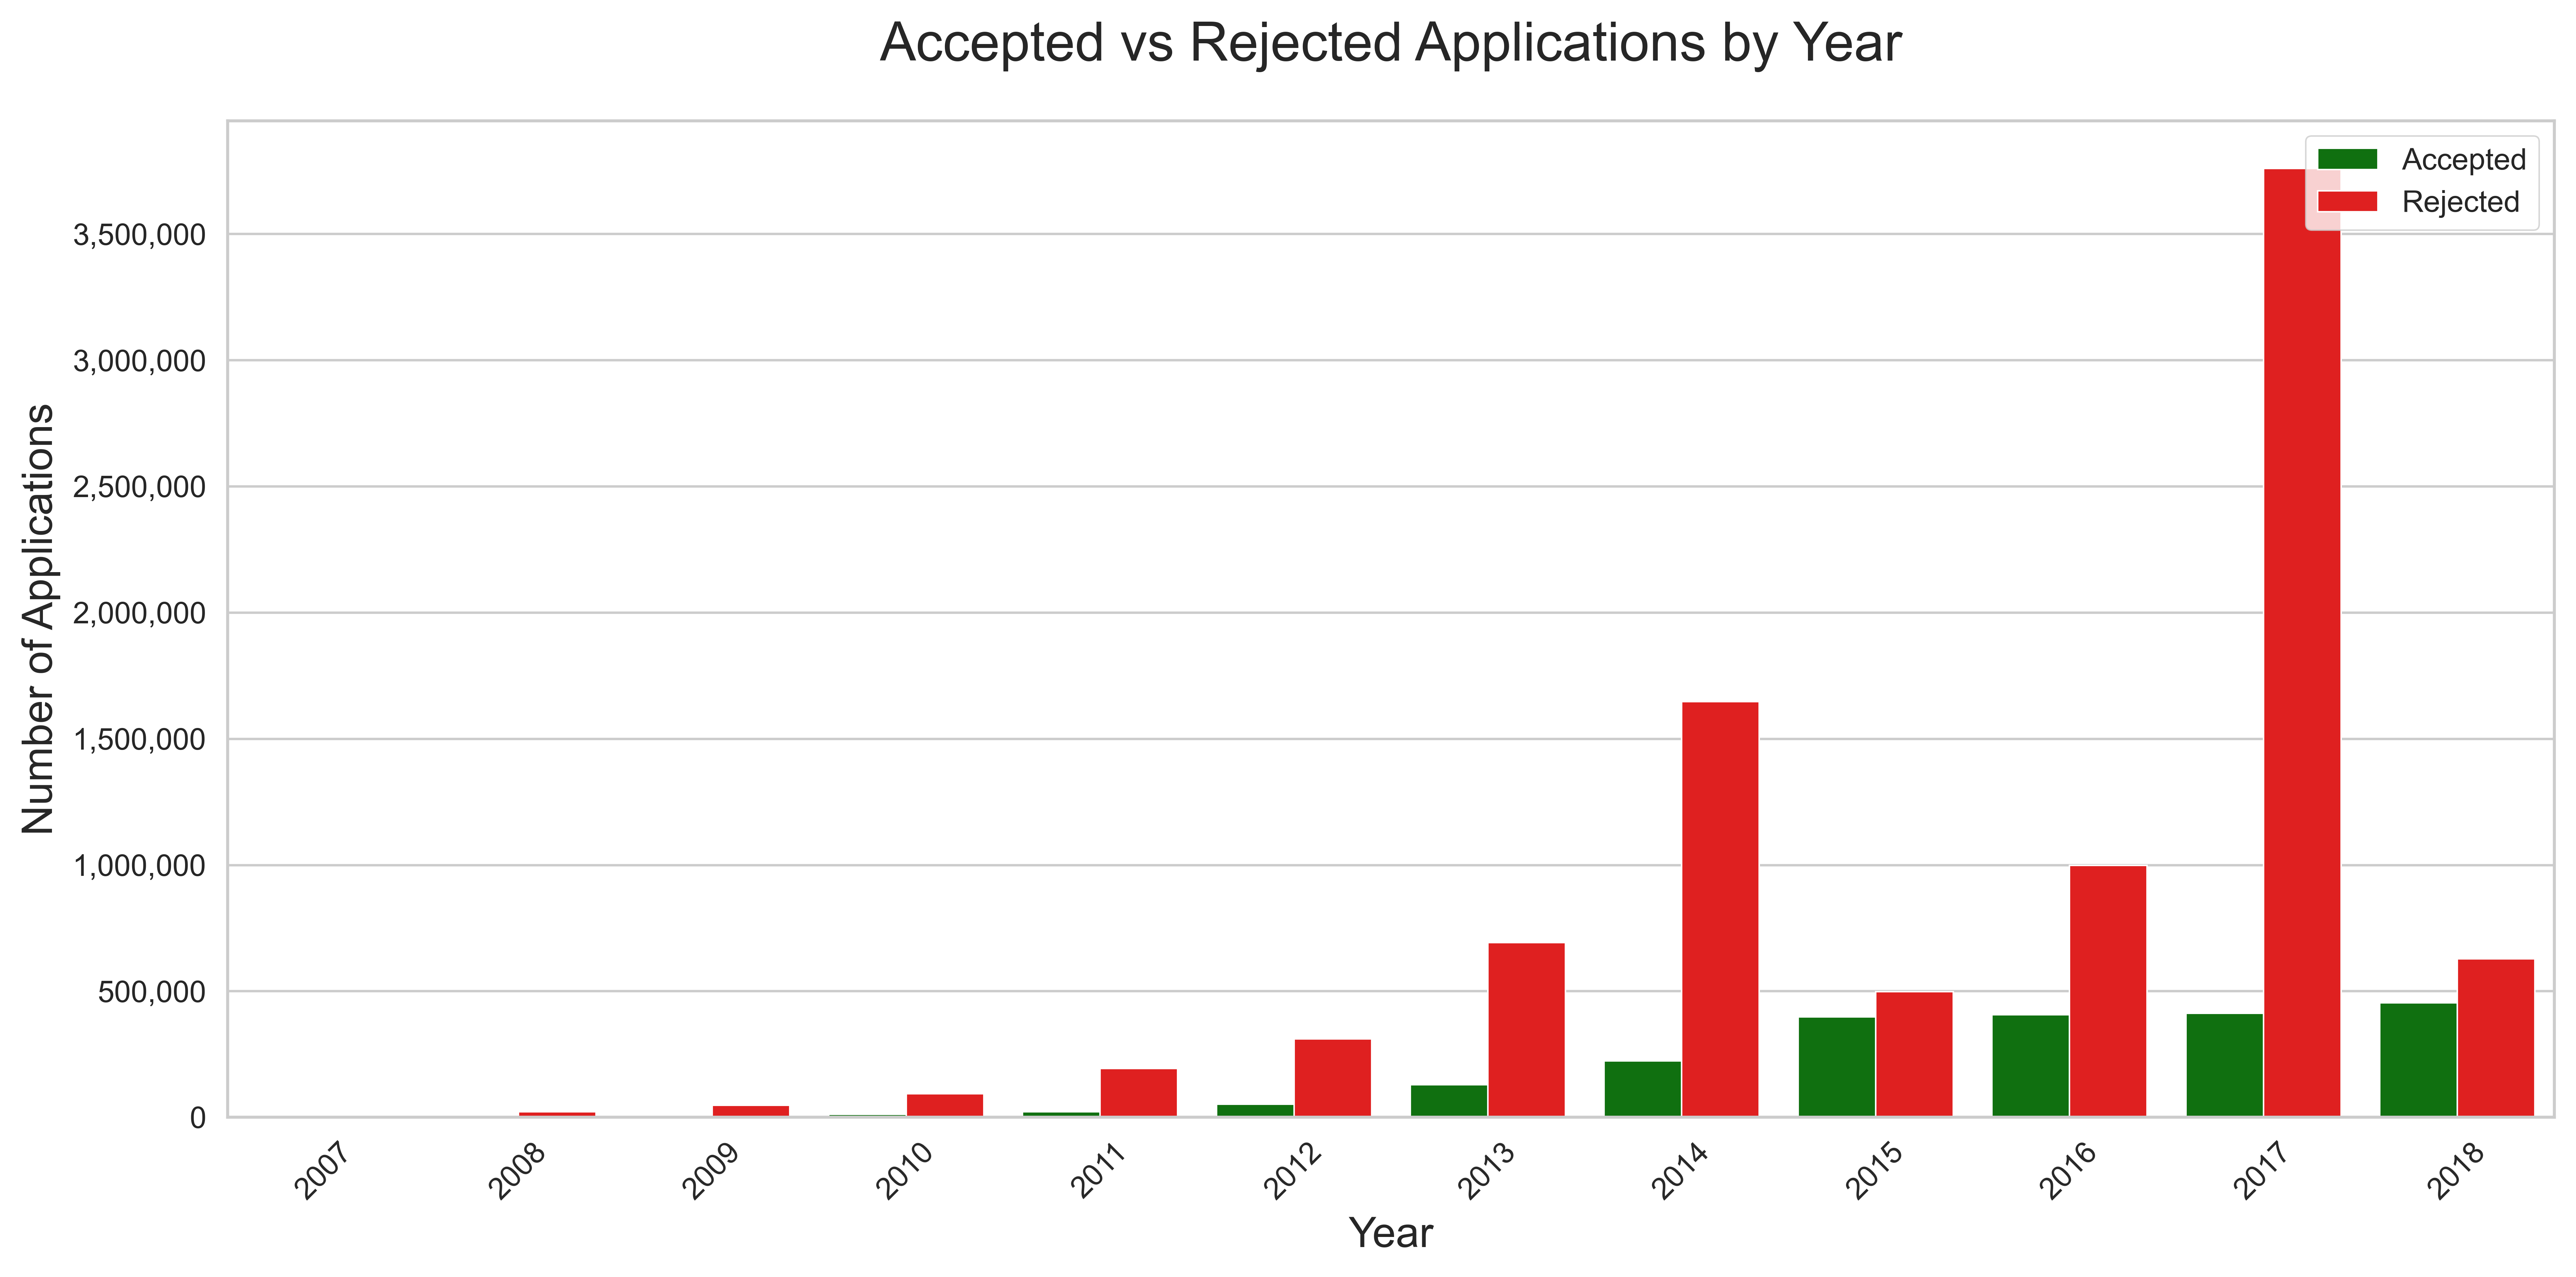

In [111]:
#Barplot- Applications Status Counts by Year
col = 'Year'

accepted_counts = (Accepted_Rejected.loc[Accepted_Rejected['Application'] == 'Accepted', col].value_counts().sort_index())
rejected_counts = (Accepted_Rejected.loc[Accepted_Rejected['Application'] == 'Rejected', col].value_counts().sort_index())

#Combine counts
col_vals = sorted(set(accepted_counts.index) | set(rejected_counts.index))
combined = pd.DataFrame({
    col: col_vals,
    'Accepted': accepted_counts.reindex(col_vals, fill_value=0).values,
    'Rejected': rejected_counts.reindex(col_vals, fill_value=0).values
})

#Convert for Seaborn
melted = combined.melt(
    id_vars=col,
    value_vars=['Accepted', 'Rejected'],
    var_name='Application_Status',
    value_name='Count'
)

sns.set_style('whitegrid')
plt.figure(figsize=(12, 6), dpi=600)

sns.barplot(
    data=melted,
    x=col,
    y='Count',
    hue='Application_Status',
    hue_order=['Accepted', 'Rejected'],
    palette=['green', 'red'],
)

plt.title(f'Accepted vs Rejected Applications by {col}', fontsize=18, pad=20)
plt.xlabel(col, fontsize=14)
plt.ylabel('Number of Applications', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='', loc='upper right')
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.tight_layout()
plt.show()

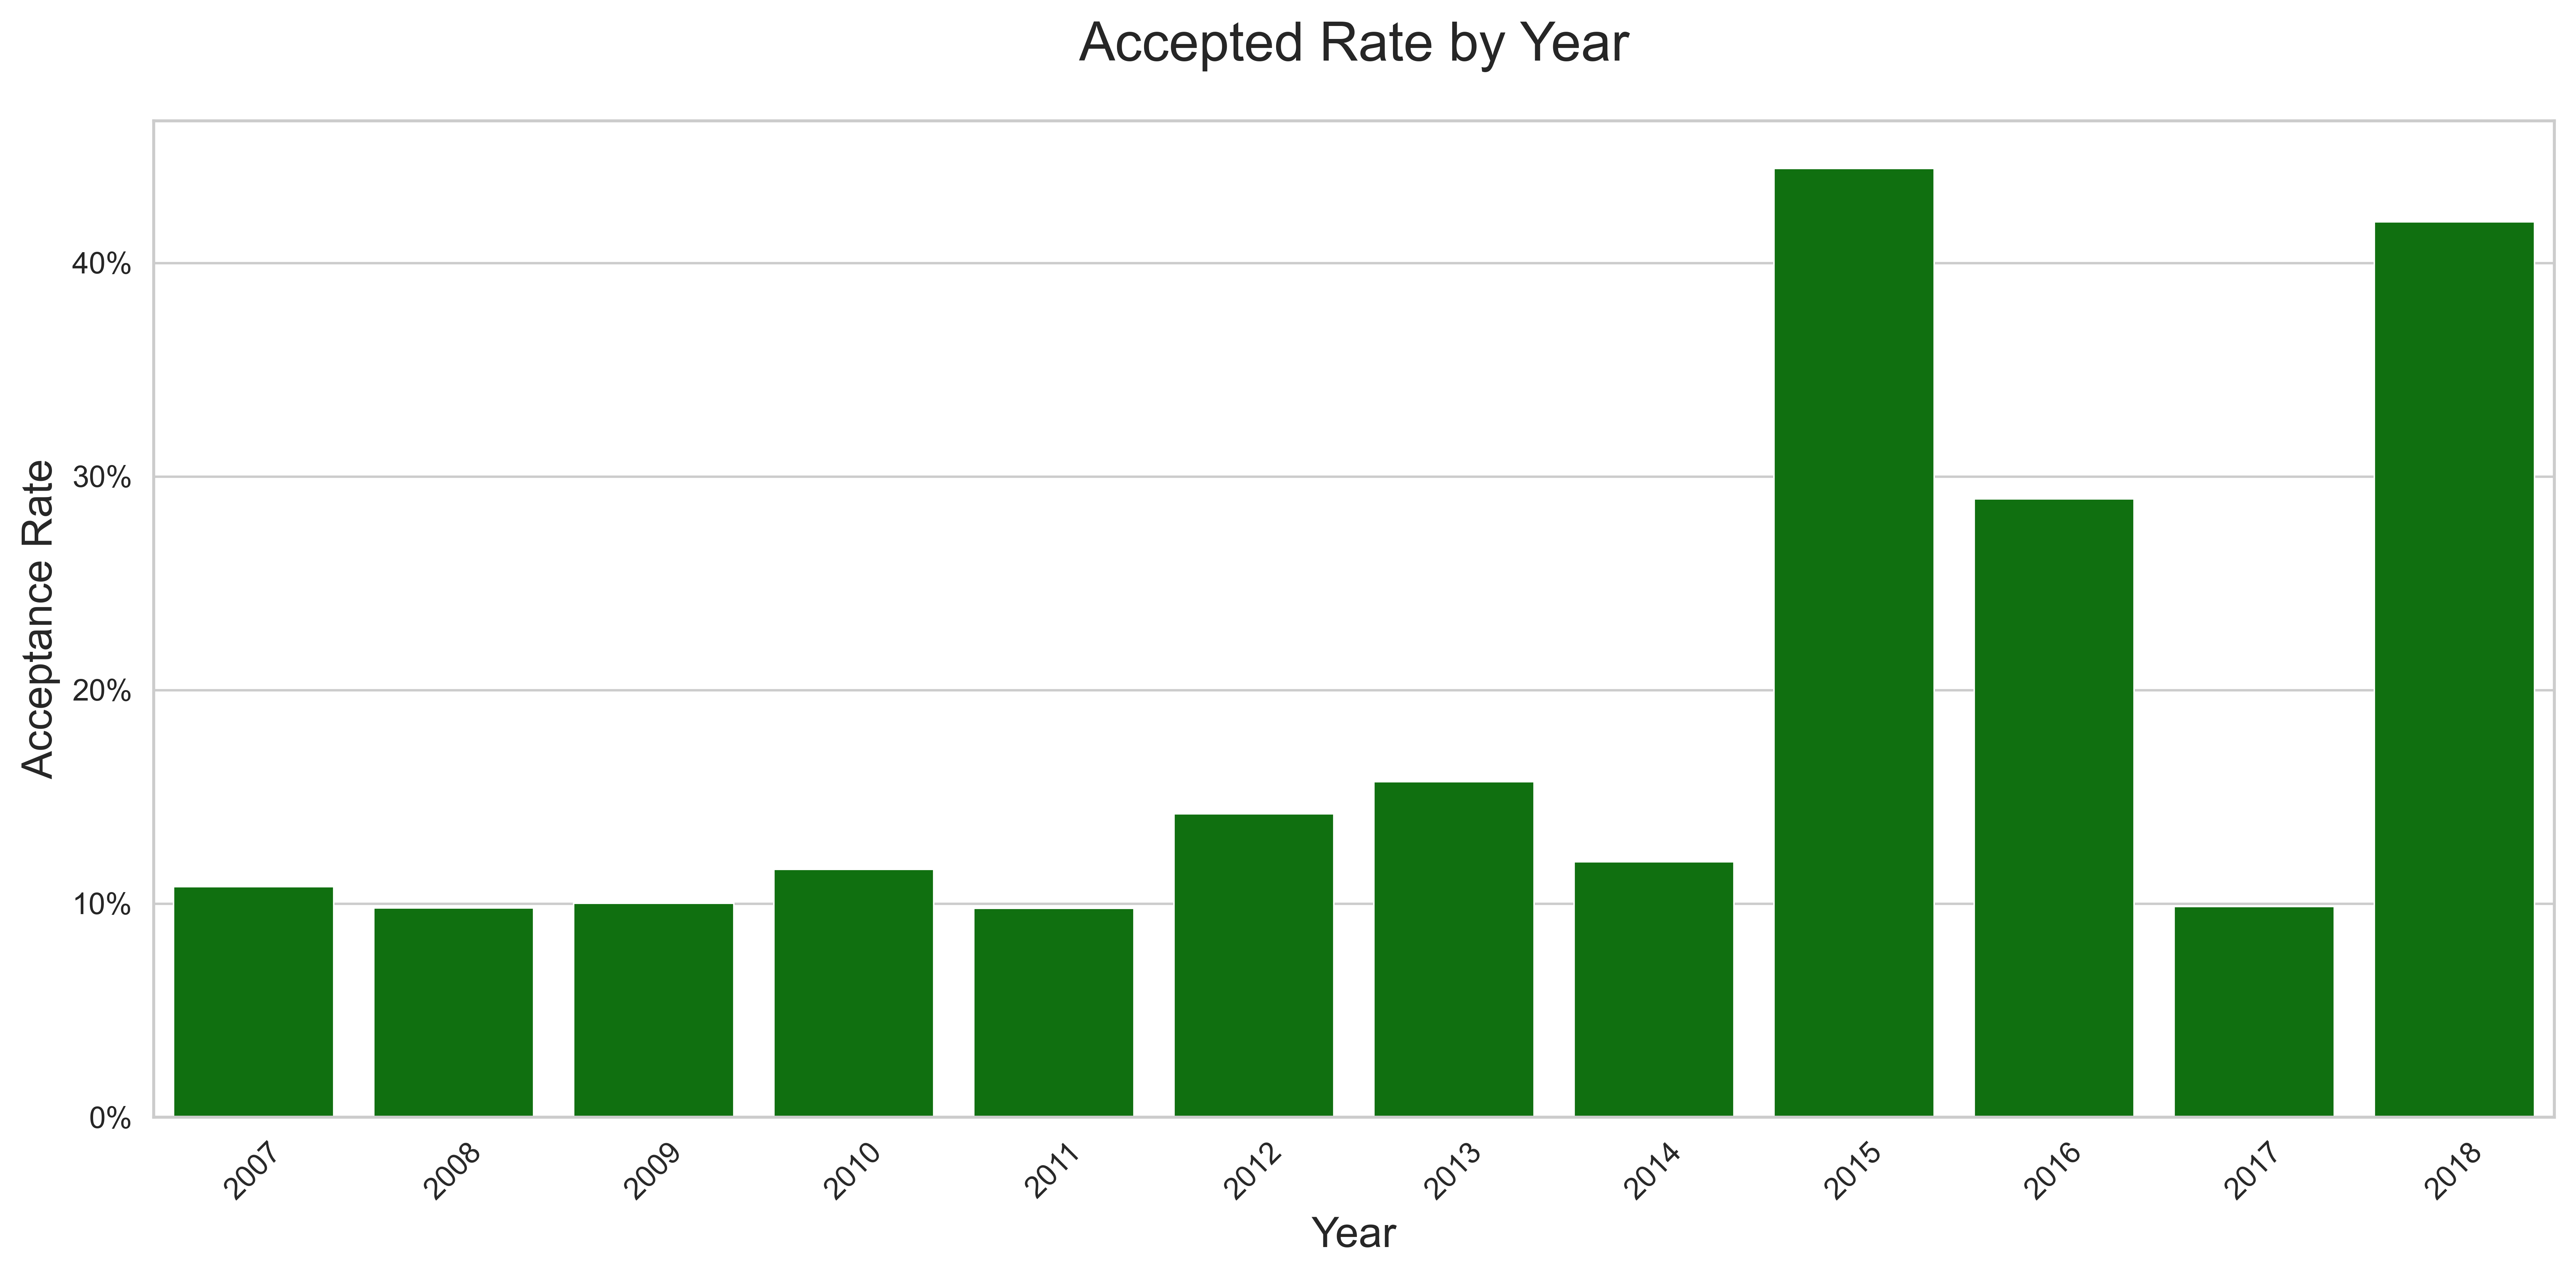

In [112]:
#Barplot- Applications ACCEPTANCE RATES by Year
col = 'Year'

accepted_counts = Accepted_Rejected.loc[Accepted_Rejected['Application'] == 'Accepted', col].value_counts().sort_index()
rejected_counts = Accepted_Rejected.loc[Accepted_Rejected['Application'] == 'Rejected', col].value_counts().sort_index()

#Combine
col_vals = sorted(set(accepted_counts.index) | set(rejected_counts.index))
combined = pd.DataFrame({
    col: col_vals,
    'Accepted': accepted_counts.reindex(col_vals, fill_value=0).values,
    'Rejected': rejected_counts.reindex(col_vals, fill_value=0).values
})

#Calculate accepted rate
combined['Accepted_Rate'] = combined['Accepted'] / (combined['Accepted'] + combined['Rejected'])

#Plot
sns.set_style('whitegrid')
plt.figure(figsize=(12, 6), dpi=600)

sns.barplot(
    data=combined,
    x=col,
    y='Accepted_Rate',
    color='green'
)
plt.title(f'Accepted Rate by {col}', fontsize=18, pad=20)
plt.xlabel(col, fontsize=14)
plt.ylabel('Acceptance Rate', fontsize=14)
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=0))
plt.tight_layout()
plt.show()

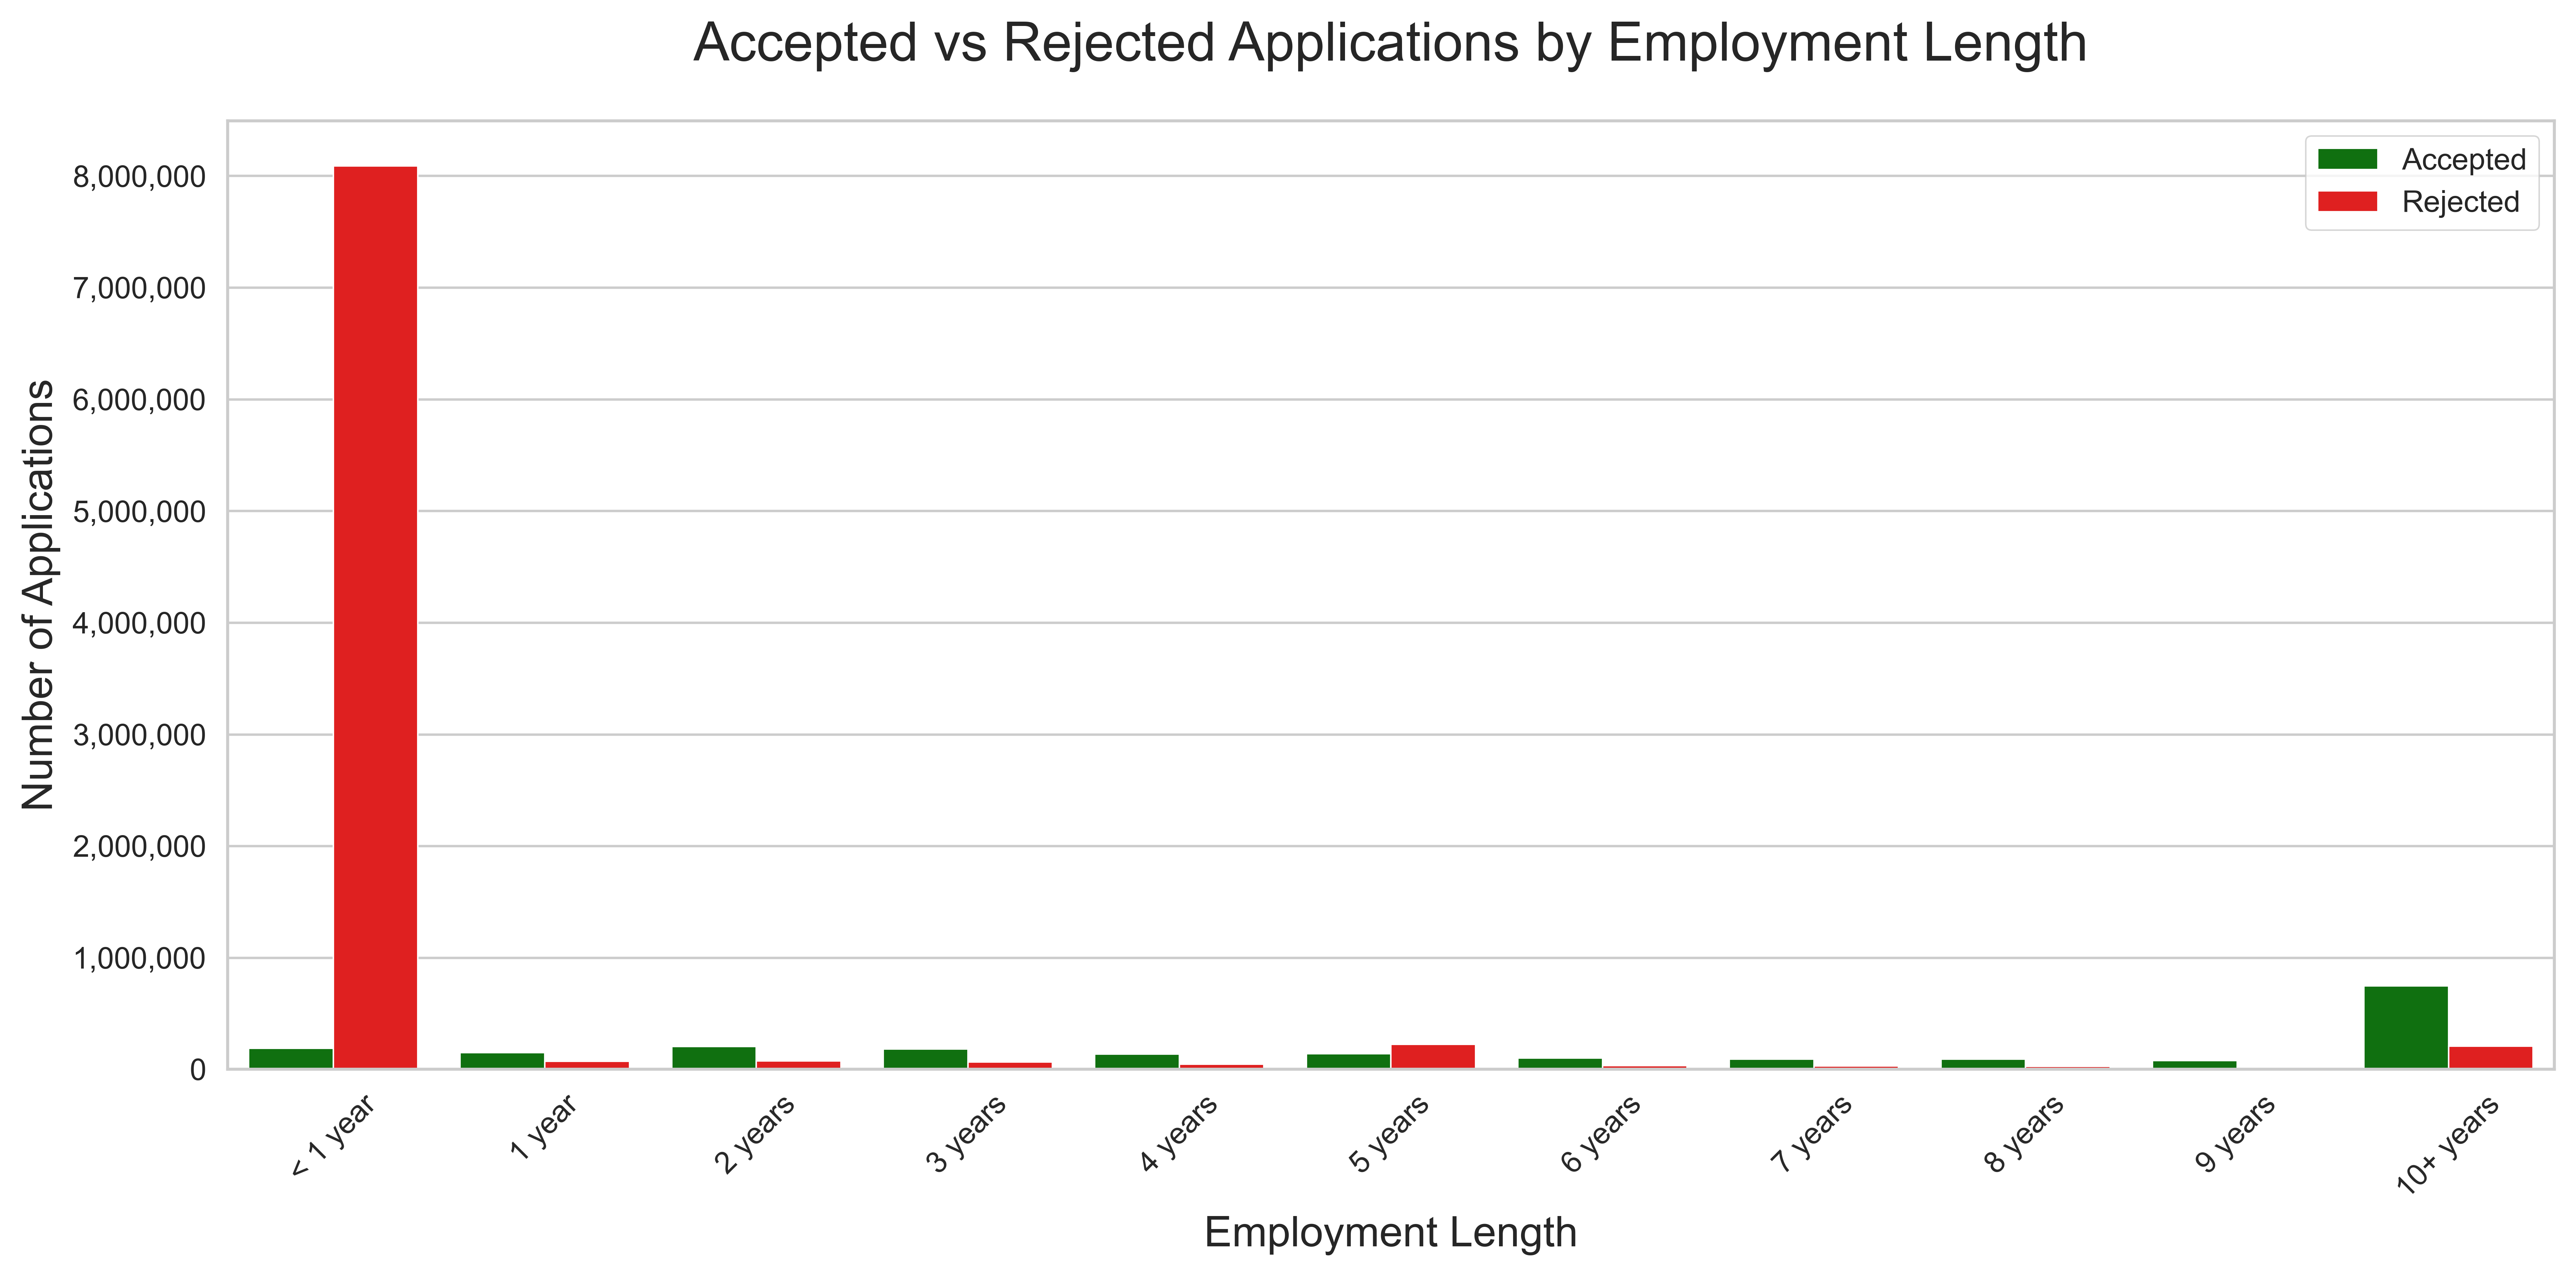

In [113]:
#Barplot- Applications Status Counts by Employment Length
col = 'Employment_Length'

accepted_counts = Accepted_Rejected[Accepted_Rejected['Application'] == 'Accepted'][col].value_counts().sort_index()
rejected_counts = Accepted_Rejected[Accepted_Rejected['Application'] == 'Rejected'][col].value_counts().sort_index()

#Combine
lengths = sorted(set(accepted_counts.index) | set(rejected_counts.index))
combined = pd.DataFrame({
    'Employment_Length': emp_length_order,
    'Accepted': accepted_counts.reindex(emp_length_order, fill_value=0).values,
    'Rejected': rejected_counts.reindex(emp_length_order, fill_value=0).values
})

#Convert for Seaborn
melted = combined.melt(
    id_vars='Employment_Length',
    value_vars=['Accepted', 'Rejected'],
    var_name='Application_Status',
    value_name='Count'
)

sns.set_style('whitegrid')
plt.figure(figsize=(12, 6), dpi=600)

sns.barplot(
    data=melted,
    x='Employment_Length',
    y='Count',
    hue='Application_Status',
    palette=['green', 'red'],
)

plt.title('Accepted vs Rejected Applications by Employment Length', fontsize=18, pad=20)
plt.xlabel('Employment Length', fontsize=14)
plt.ylabel('Number of Applications', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='', loc='upper right')
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.tight_layout()
plt.show()

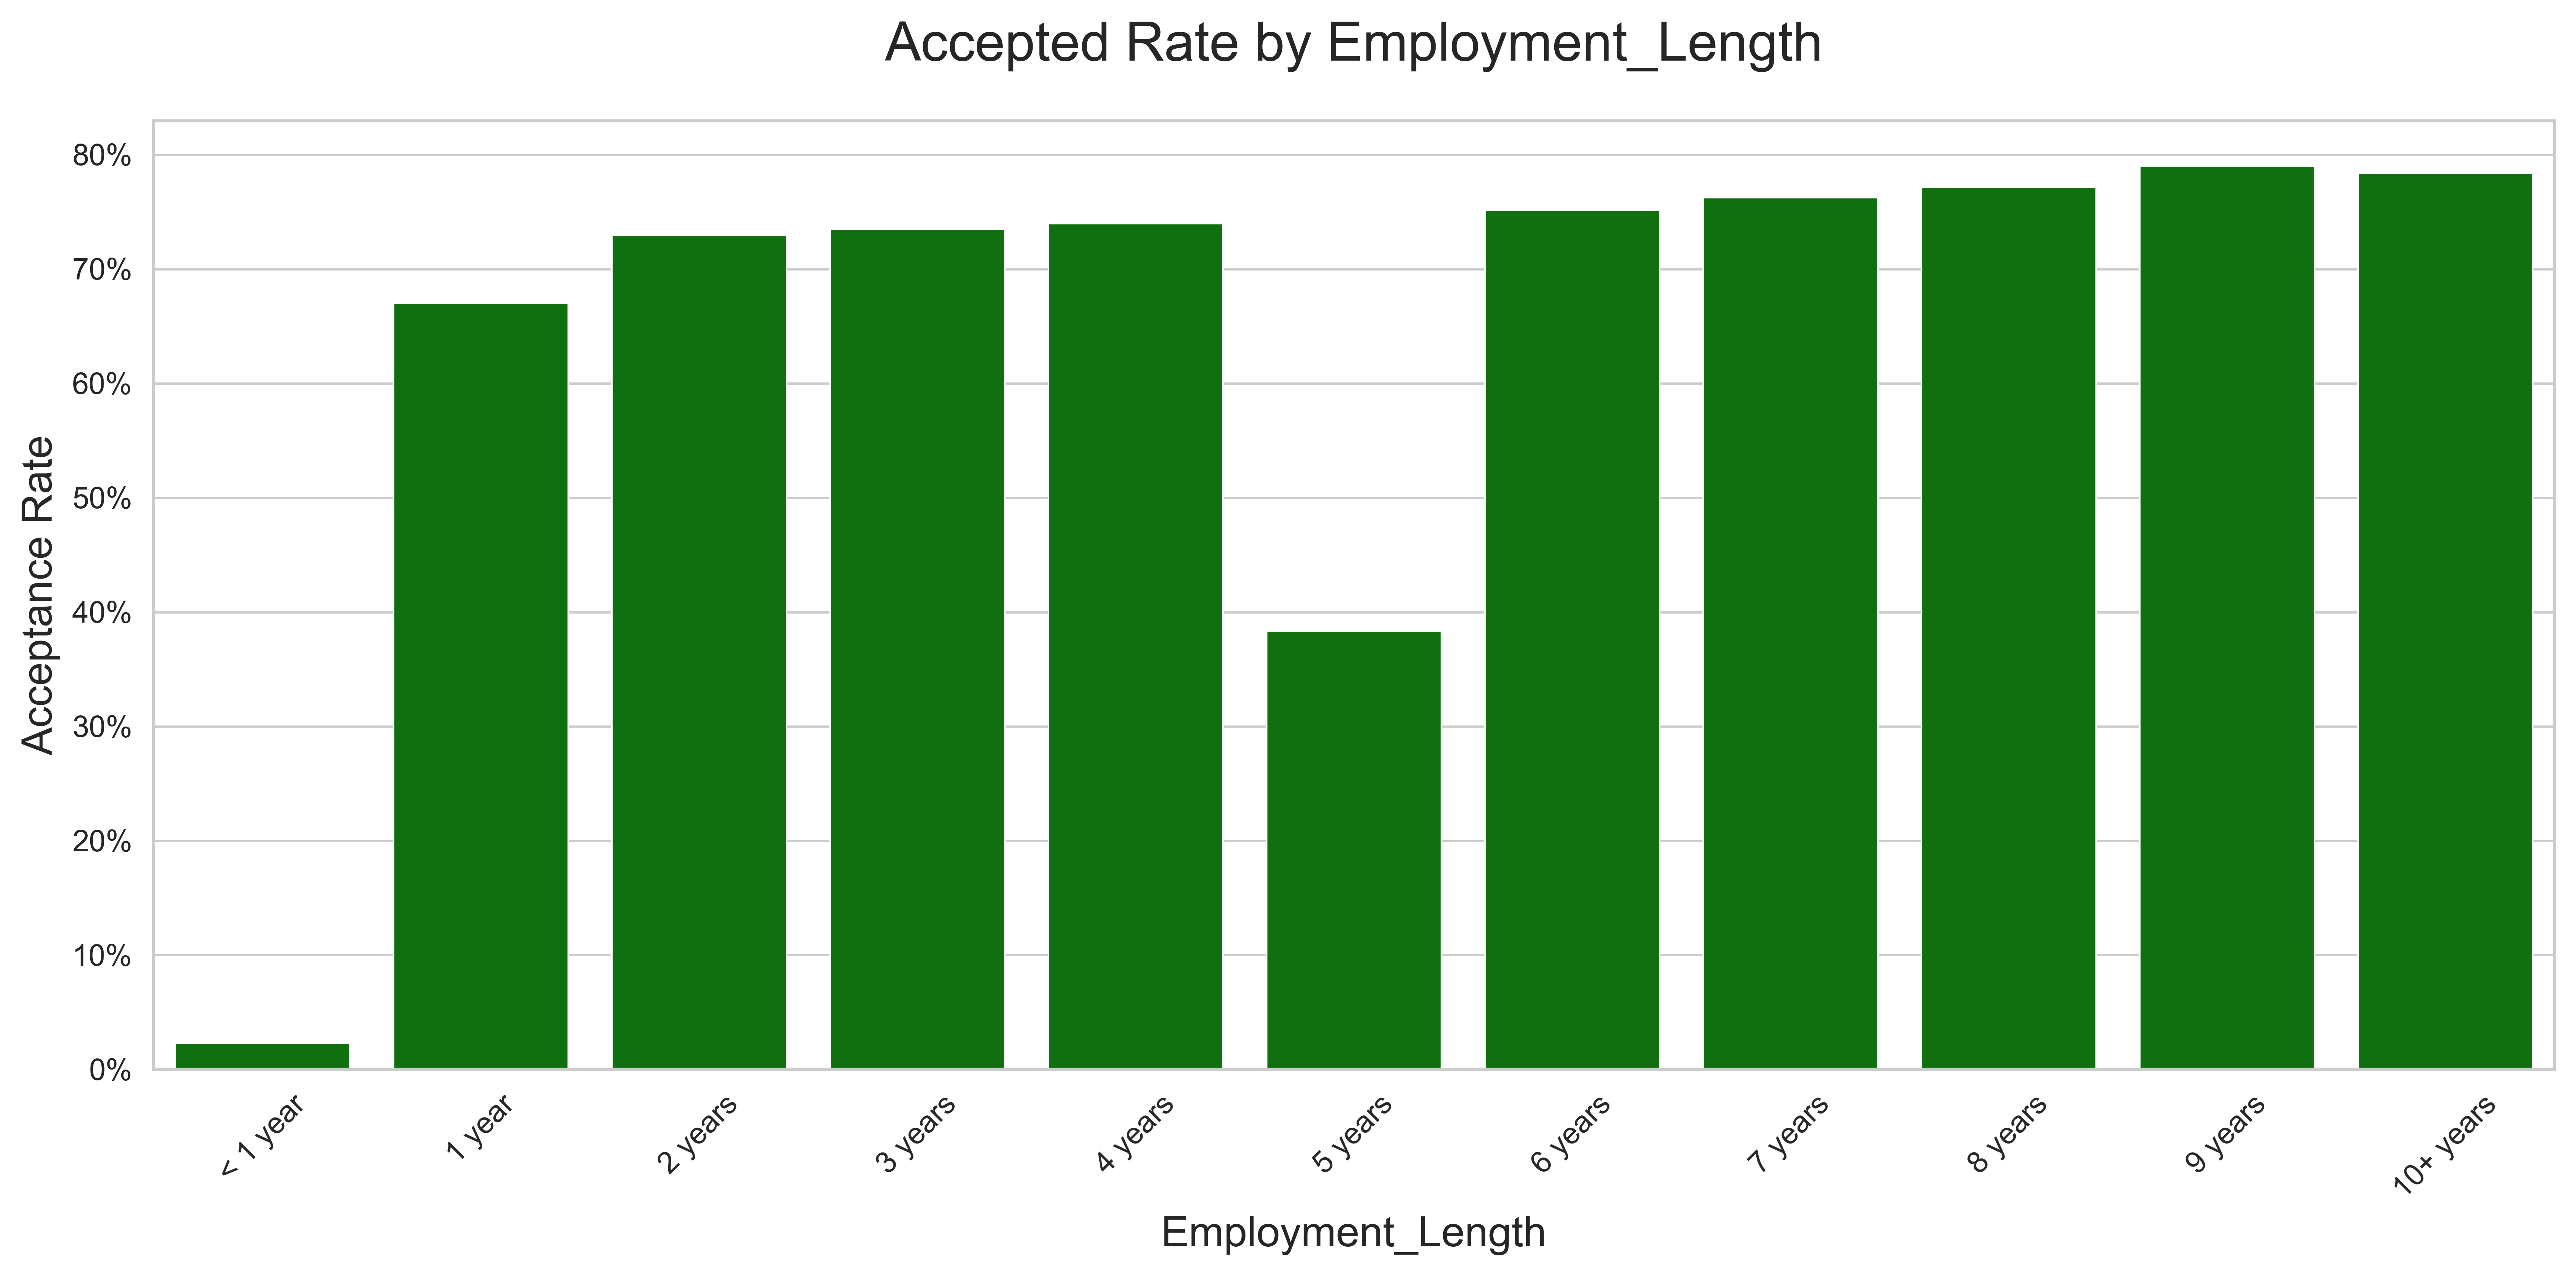

In [114]:
#Barplot- Applications ACCEPTANCE RATES by Employment Length
col = 'Employment_Length'

accepted_counts = Accepted_Rejected.loc[Accepted_Rejected['Application'] == 'Accepted', col].value_counts().sort_index()
rejected_counts = Accepted_Rejected.loc[Accepted_Rejected['Application'] == 'Rejected', col].value_counts().sort_index()

#Combine
col_vals = sorted(set(accepted_counts.index) | set(rejected_counts.index))
combined = pd.DataFrame({
    col: emp_length_order,
    'Accepted': accepted_counts.reindex(emp_length_order, fill_value=0).values,
    'Rejected': rejected_counts.reindex(emp_length_order, fill_value=0).values
})

#Calculate accepted rate
combined['Accepted_Rate'] = combined['Accepted'] / (combined['Accepted'] + combined['Rejected'])

#Plot
sns.set_style('whitegrid')
plt.figure(figsize=(12, 6), dpi=600)

sns.barplot(
    data=combined,
    x=col,
    y='Accepted_Rate',
    color='green'
)
plt.title(f'Accepted Rate by {col}', fontsize=18, pad=20)
plt.xlabel(col, fontsize=14)
plt.ylabel('Acceptance Rate', fontsize=14)
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=0))
plt.tight_layout()
plt.show()

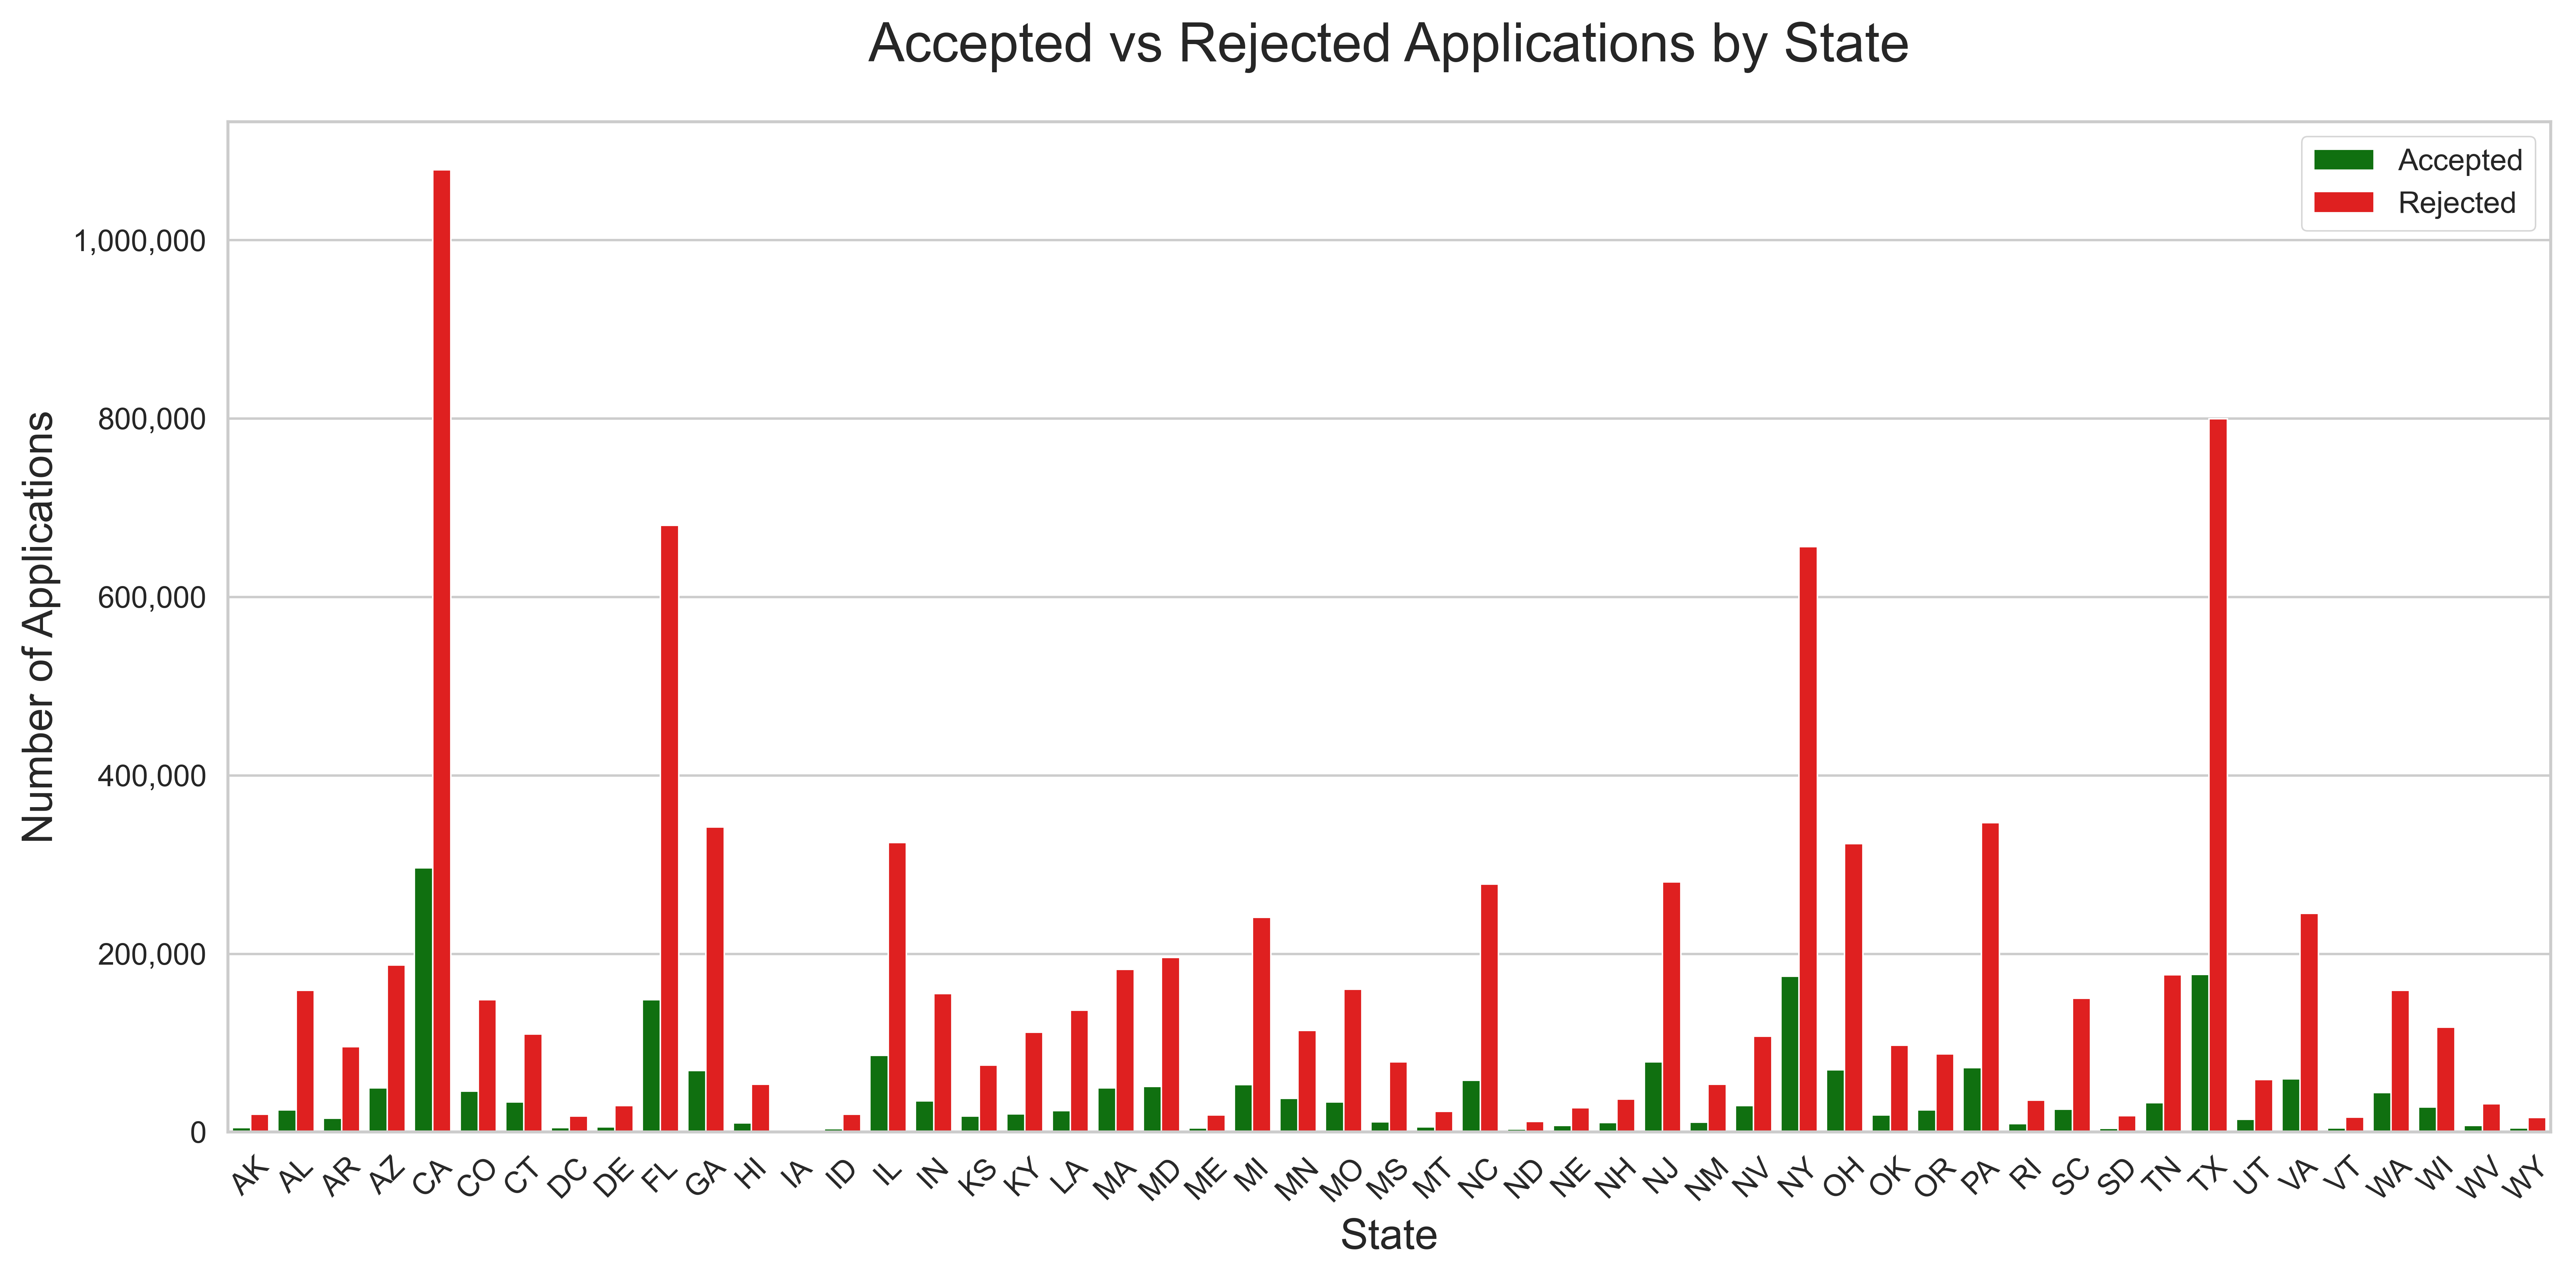

In [115]:
#Barplot- Applications Status Counts by State
col = 'State'

accepted_counts = (Accepted_Rejected.loc[Accepted_Rejected['Application'] == 'Accepted', col].value_counts().sort_index())
rejected_counts = (Accepted_Rejected.loc[Accepted_Rejected['Application'] == 'Rejected', col].value_counts().sort_index())

#Combine counts
col_vals = sorted(set(accepted_counts.index) | set(rejected_counts.index))
combined = pd.DataFrame({
    col: col_vals,
    'Accepted': accepted_counts.reindex(col_vals, fill_value=0).values,
    'Rejected': rejected_counts.reindex(col_vals, fill_value=0).values
})

#Convert for Seaborn
melted = combined.melt(
    id_vars=col,
    value_vars=['Accepted', 'Rejected'],
    var_name='Application_Status',
    value_name='Count'
)

sns.set_style('whitegrid')
plt.figure(figsize=(12, 6), dpi=600)

sns.barplot(
    data=melted,
    x=col,
    y='Count',
    hue='Application_Status',
    hue_order=['Accepted', 'Rejected'],
    palette=['green', 'red'],
)

plt.title(f'Accepted vs Rejected Applications by {col}', fontsize=18, pad=20)
plt.xlabel(col, fontsize=14)
plt.ylabel('Number of Applications', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='', loc='upper right')
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.tight_layout()
plt.show()

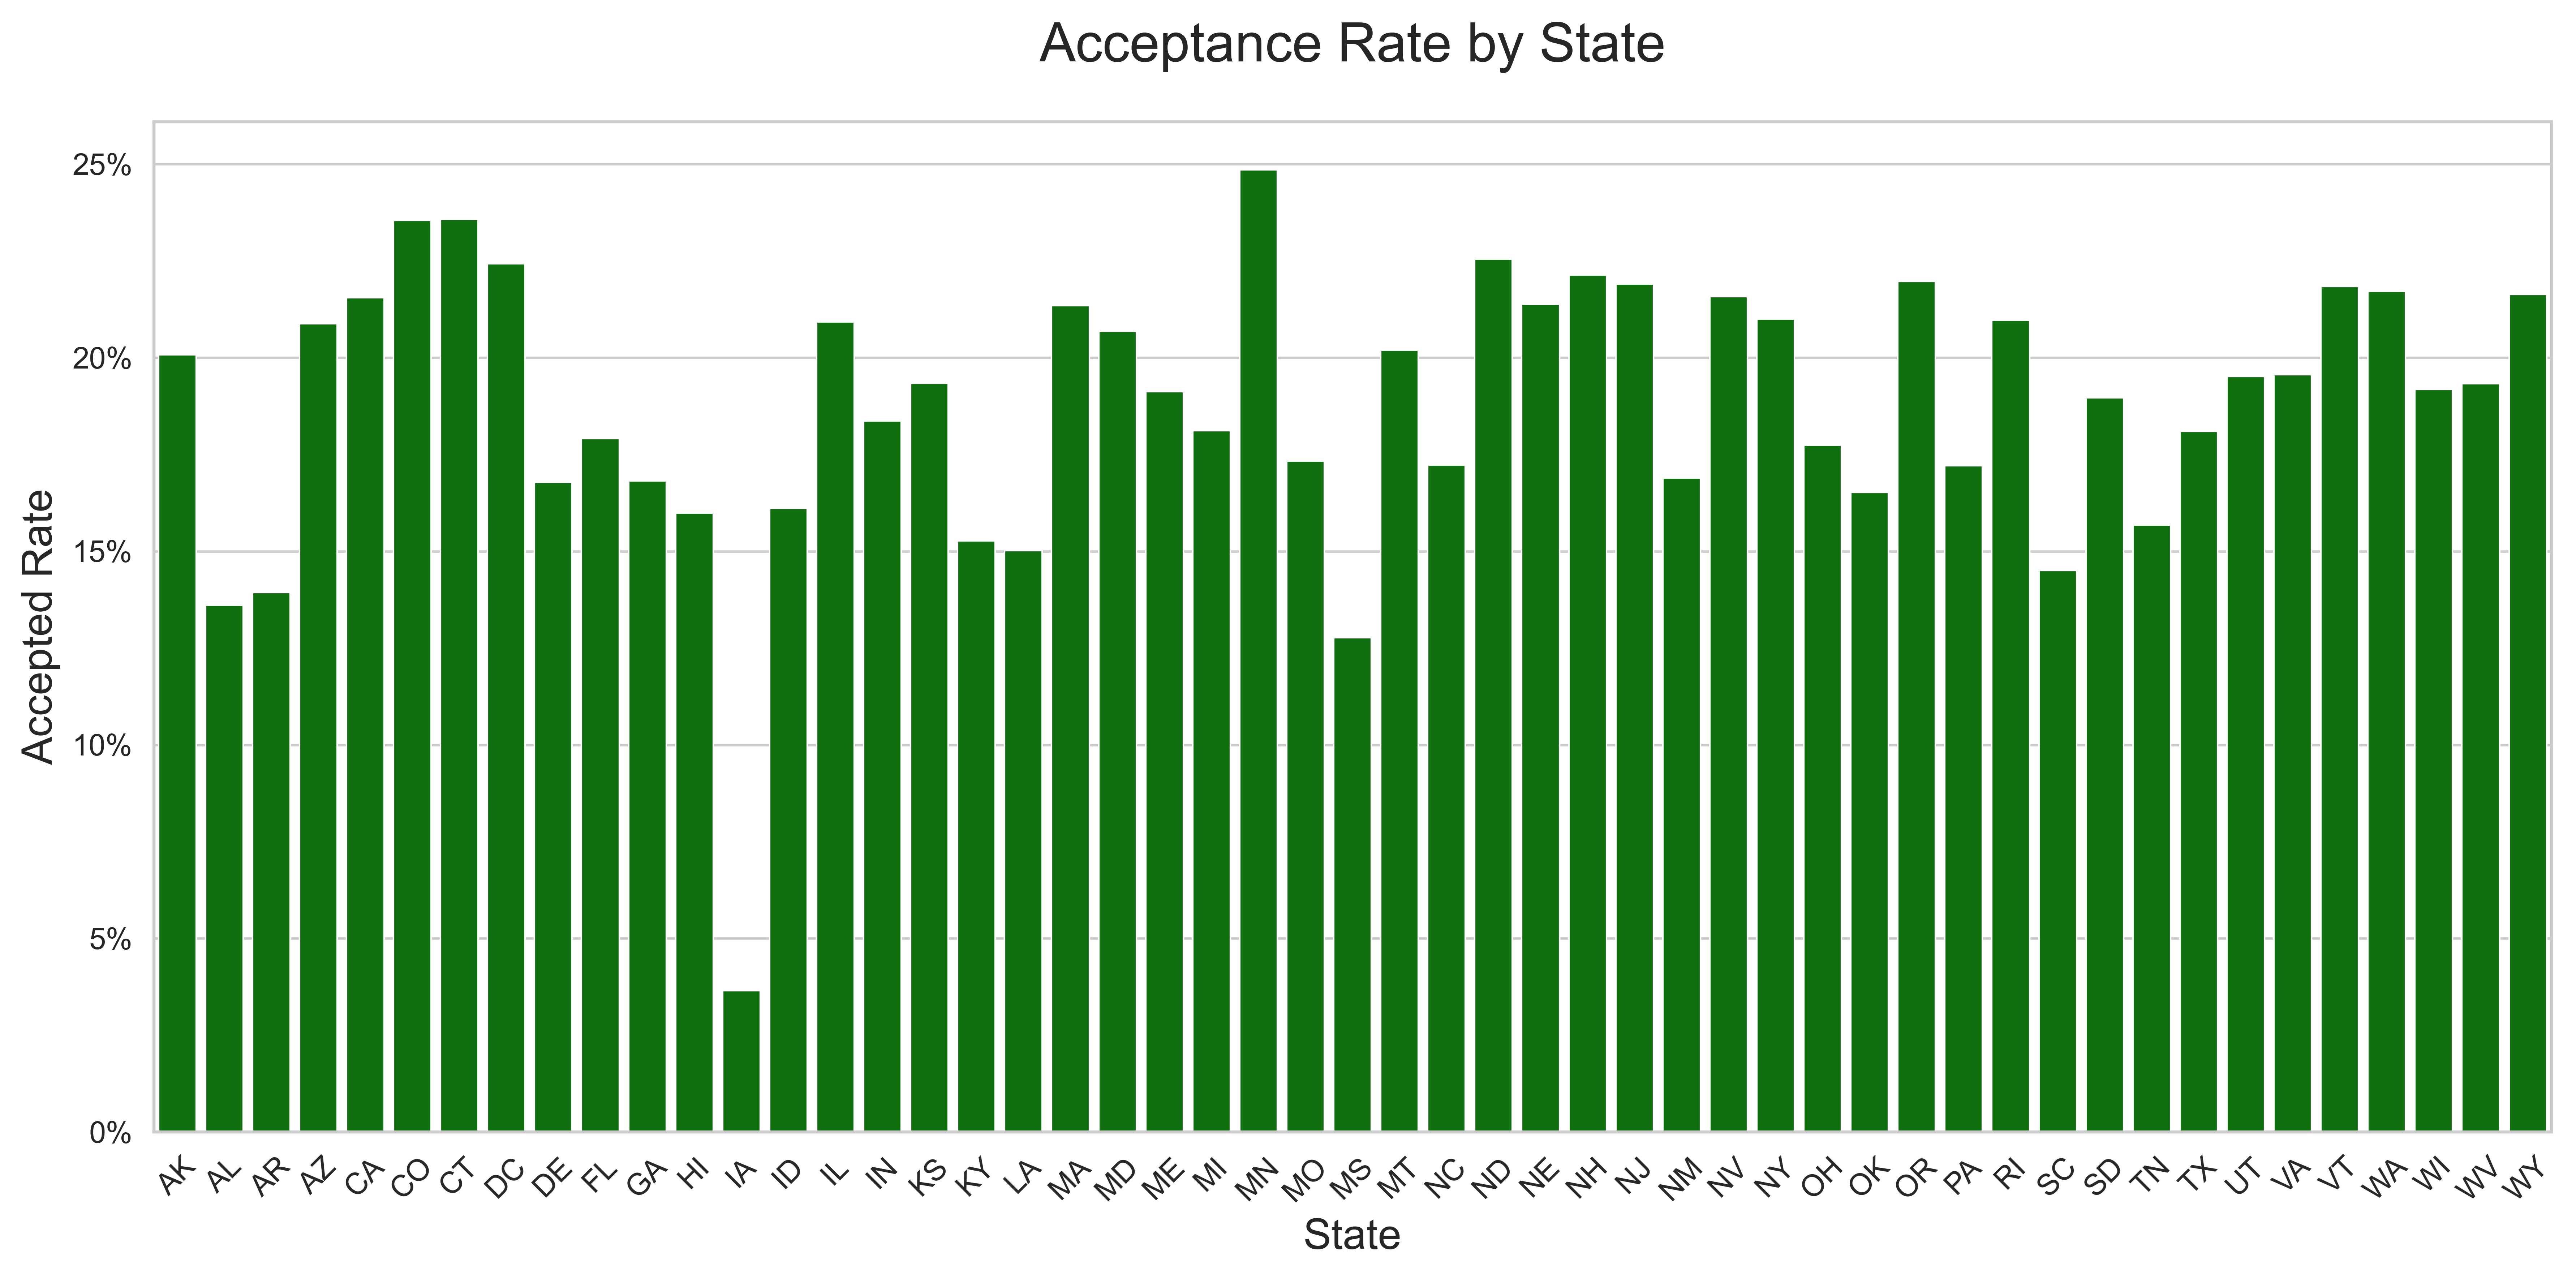

In [116]:
#Barplot- Applications ACCEPTANCE RATES by State
col = 'State'

accepted_counts = Accepted_Rejected.loc[Accepted_Rejected['Application'] == 'Accepted', col].value_counts().sort_index()
rejected_counts = Accepted_Rejected.loc[Accepted_Rejected['Application'] == 'Rejected', col].value_counts().sort_index()

#Combine
col_vals = sorted(set(accepted_counts.index) | set(rejected_counts.index))
combined = pd.DataFrame({
    col: col_vals,
    'Accepted': accepted_counts.reindex(col_vals, fill_value=0).values,
    'Rejected': rejected_counts.reindex(col_vals, fill_value=0).values
})

#Calculate accepted rate
combined['Accepted_Rate'] = combined['Accepted'] / (combined['Accepted'] + combined['Rejected'])

#Plot
sns.set_style('whitegrid')
plt.figure(figsize=(12, 6), dpi=600)

sns.barplot(
    data=combined,
    x=col,
    y='Accepted_Rate',
    color='green'
)
plt.title(f'Acceptance Rate by {col}', fontsize=18, pad=20)
plt.xlabel(col, fontsize=14)
plt.ylabel('Accepted Rate', fontsize=14)
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=0))
plt.tight_layout()
plt.show()

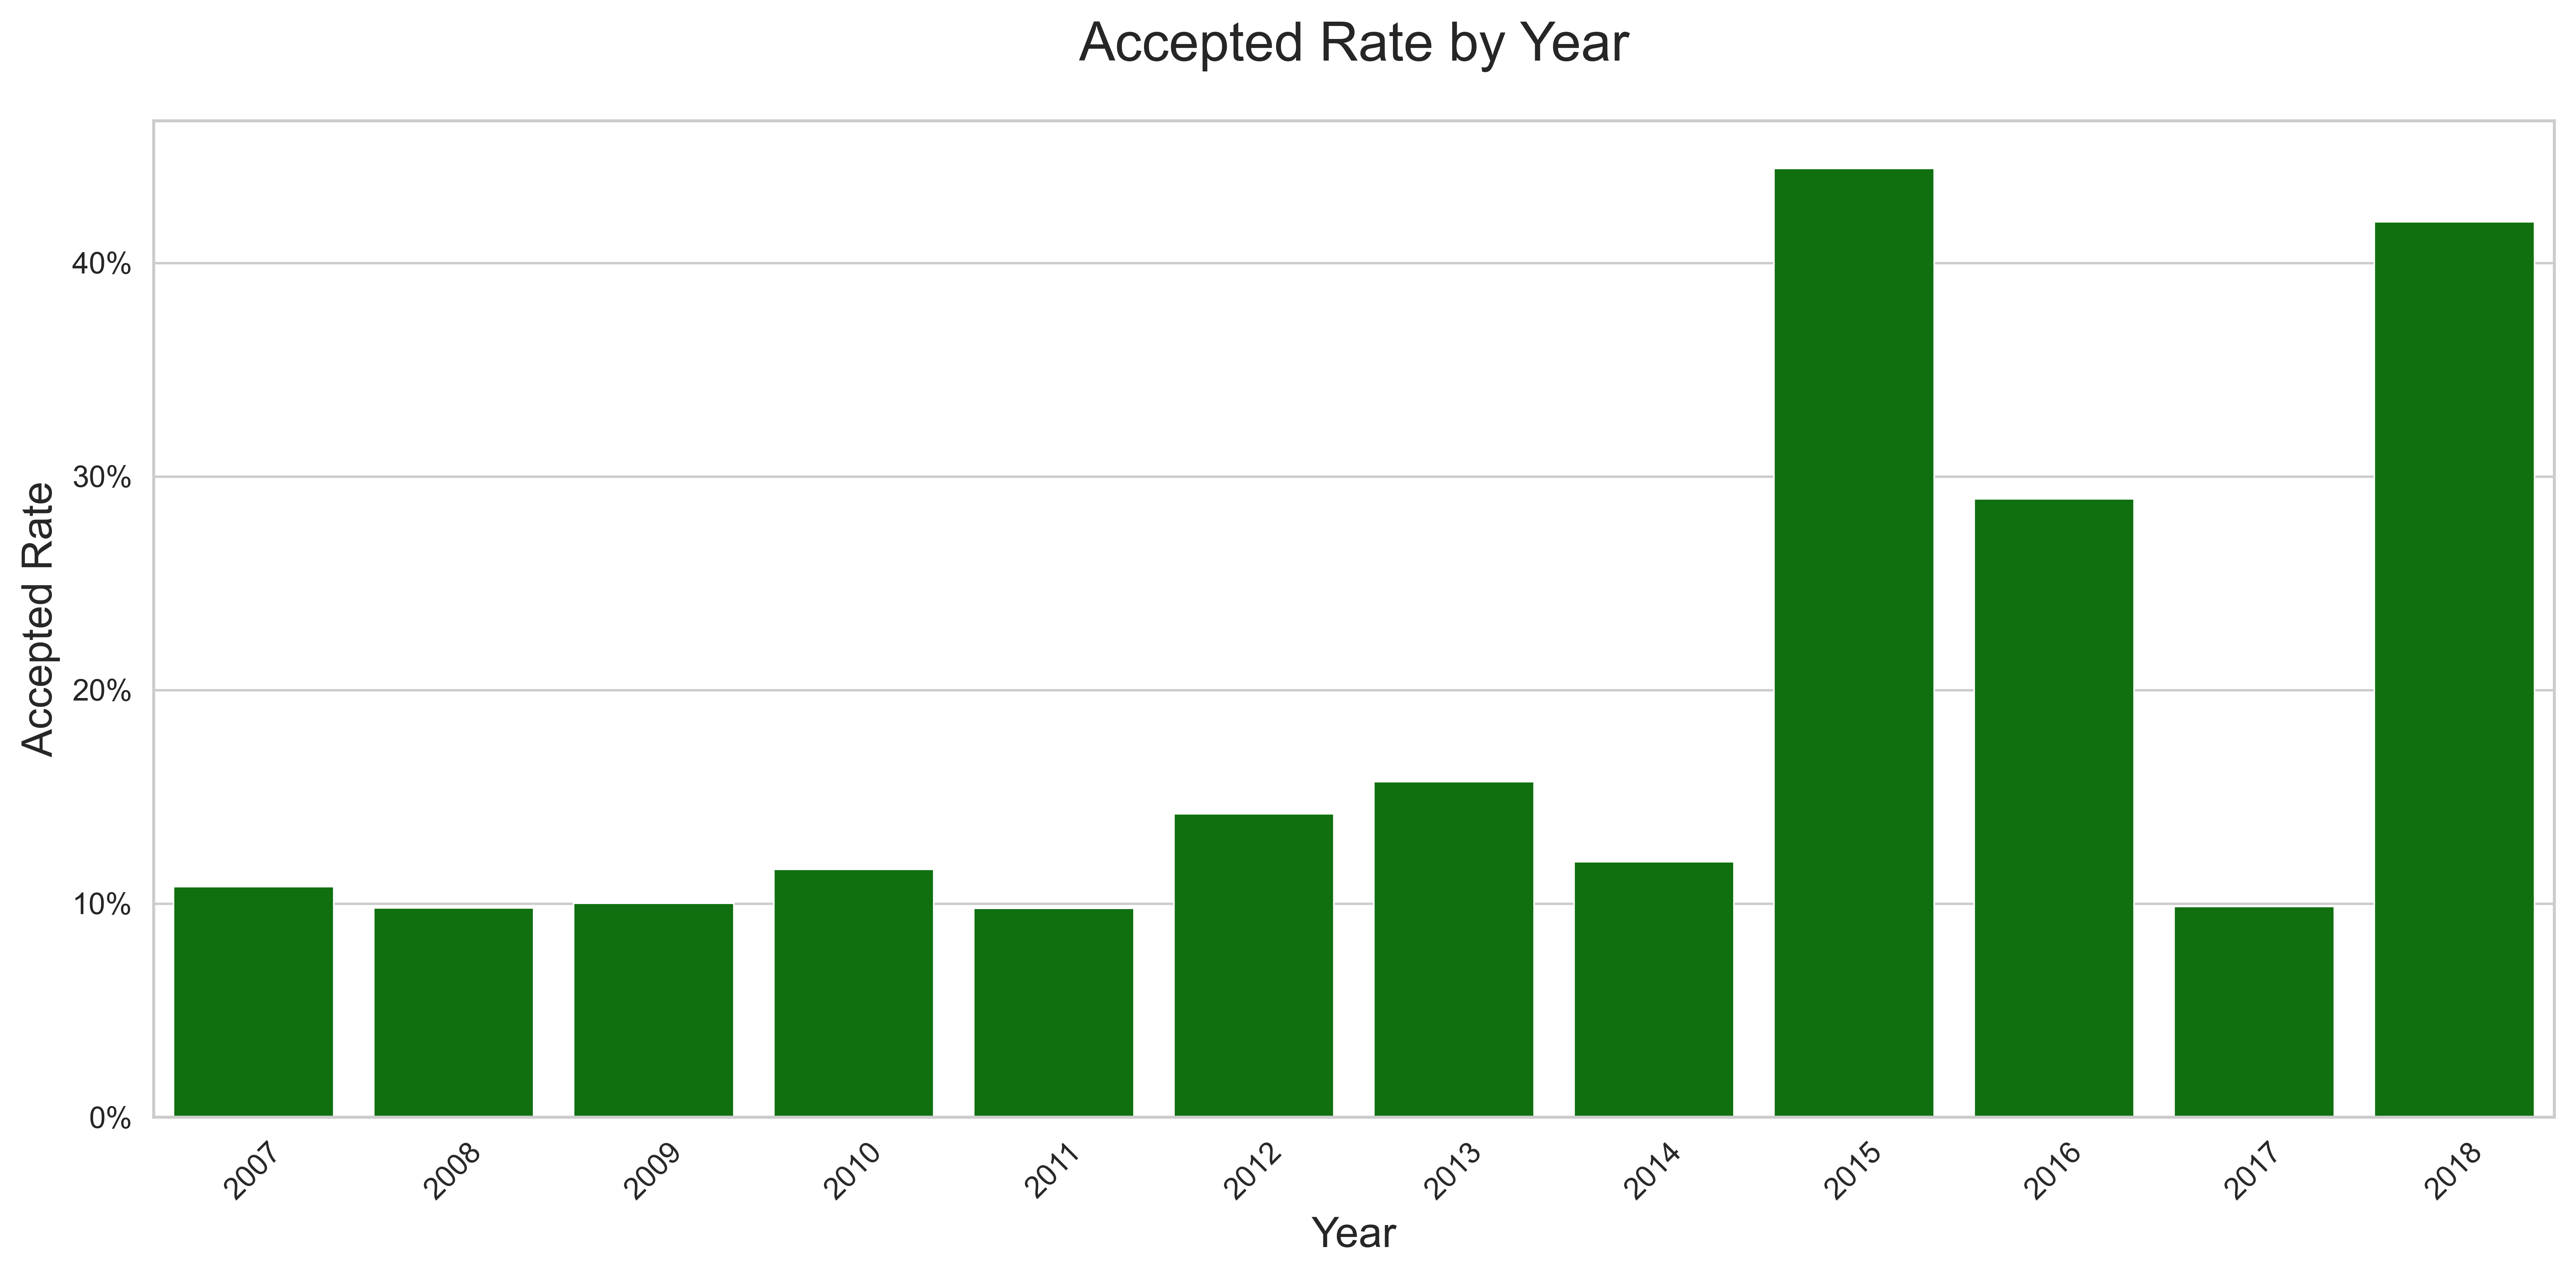

In [117]:
#Barplot- Applications ACCEPTANCE RATES by State
col = 'Year'

accepted_counts = Accepted_Rejected.loc[Accepted_Rejected['Application'] == 'Accepted', col].value_counts().sort_index()
rejected_counts = Accepted_Rejected.loc[Accepted_Rejected['Application'] == 'Rejected', col].value_counts().sort_index()

#Combine
col_vals = sorted(set(accepted_counts.index) | set(rejected_counts.index))
combined = pd.DataFrame({
    col: col_vals,
    'Accepted': accepted_counts.reindex(col_vals, fill_value=0).values,
    'Rejected': rejected_counts.reindex(col_vals, fill_value=0).values
})

#Calculate accepted rate
combined['Accepted_Rate'] = combined['Accepted'] / (combined['Accepted'] + combined['Rejected'])

#Plot
sns.set_style('whitegrid')
plt.figure(figsize=(12, 6), dpi=600)

sns.barplot(
    data=combined,
    x=col,
    y='Accepted_Rate',
    color='green'
)
plt.title(f'Accepted Rate by {col}', fontsize=18, pad=20)
plt.xlabel(col, fontsize=14)
plt.ylabel('Accepted Rate', fontsize=14)
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=0))
plt.tight_layout()
plt.show()

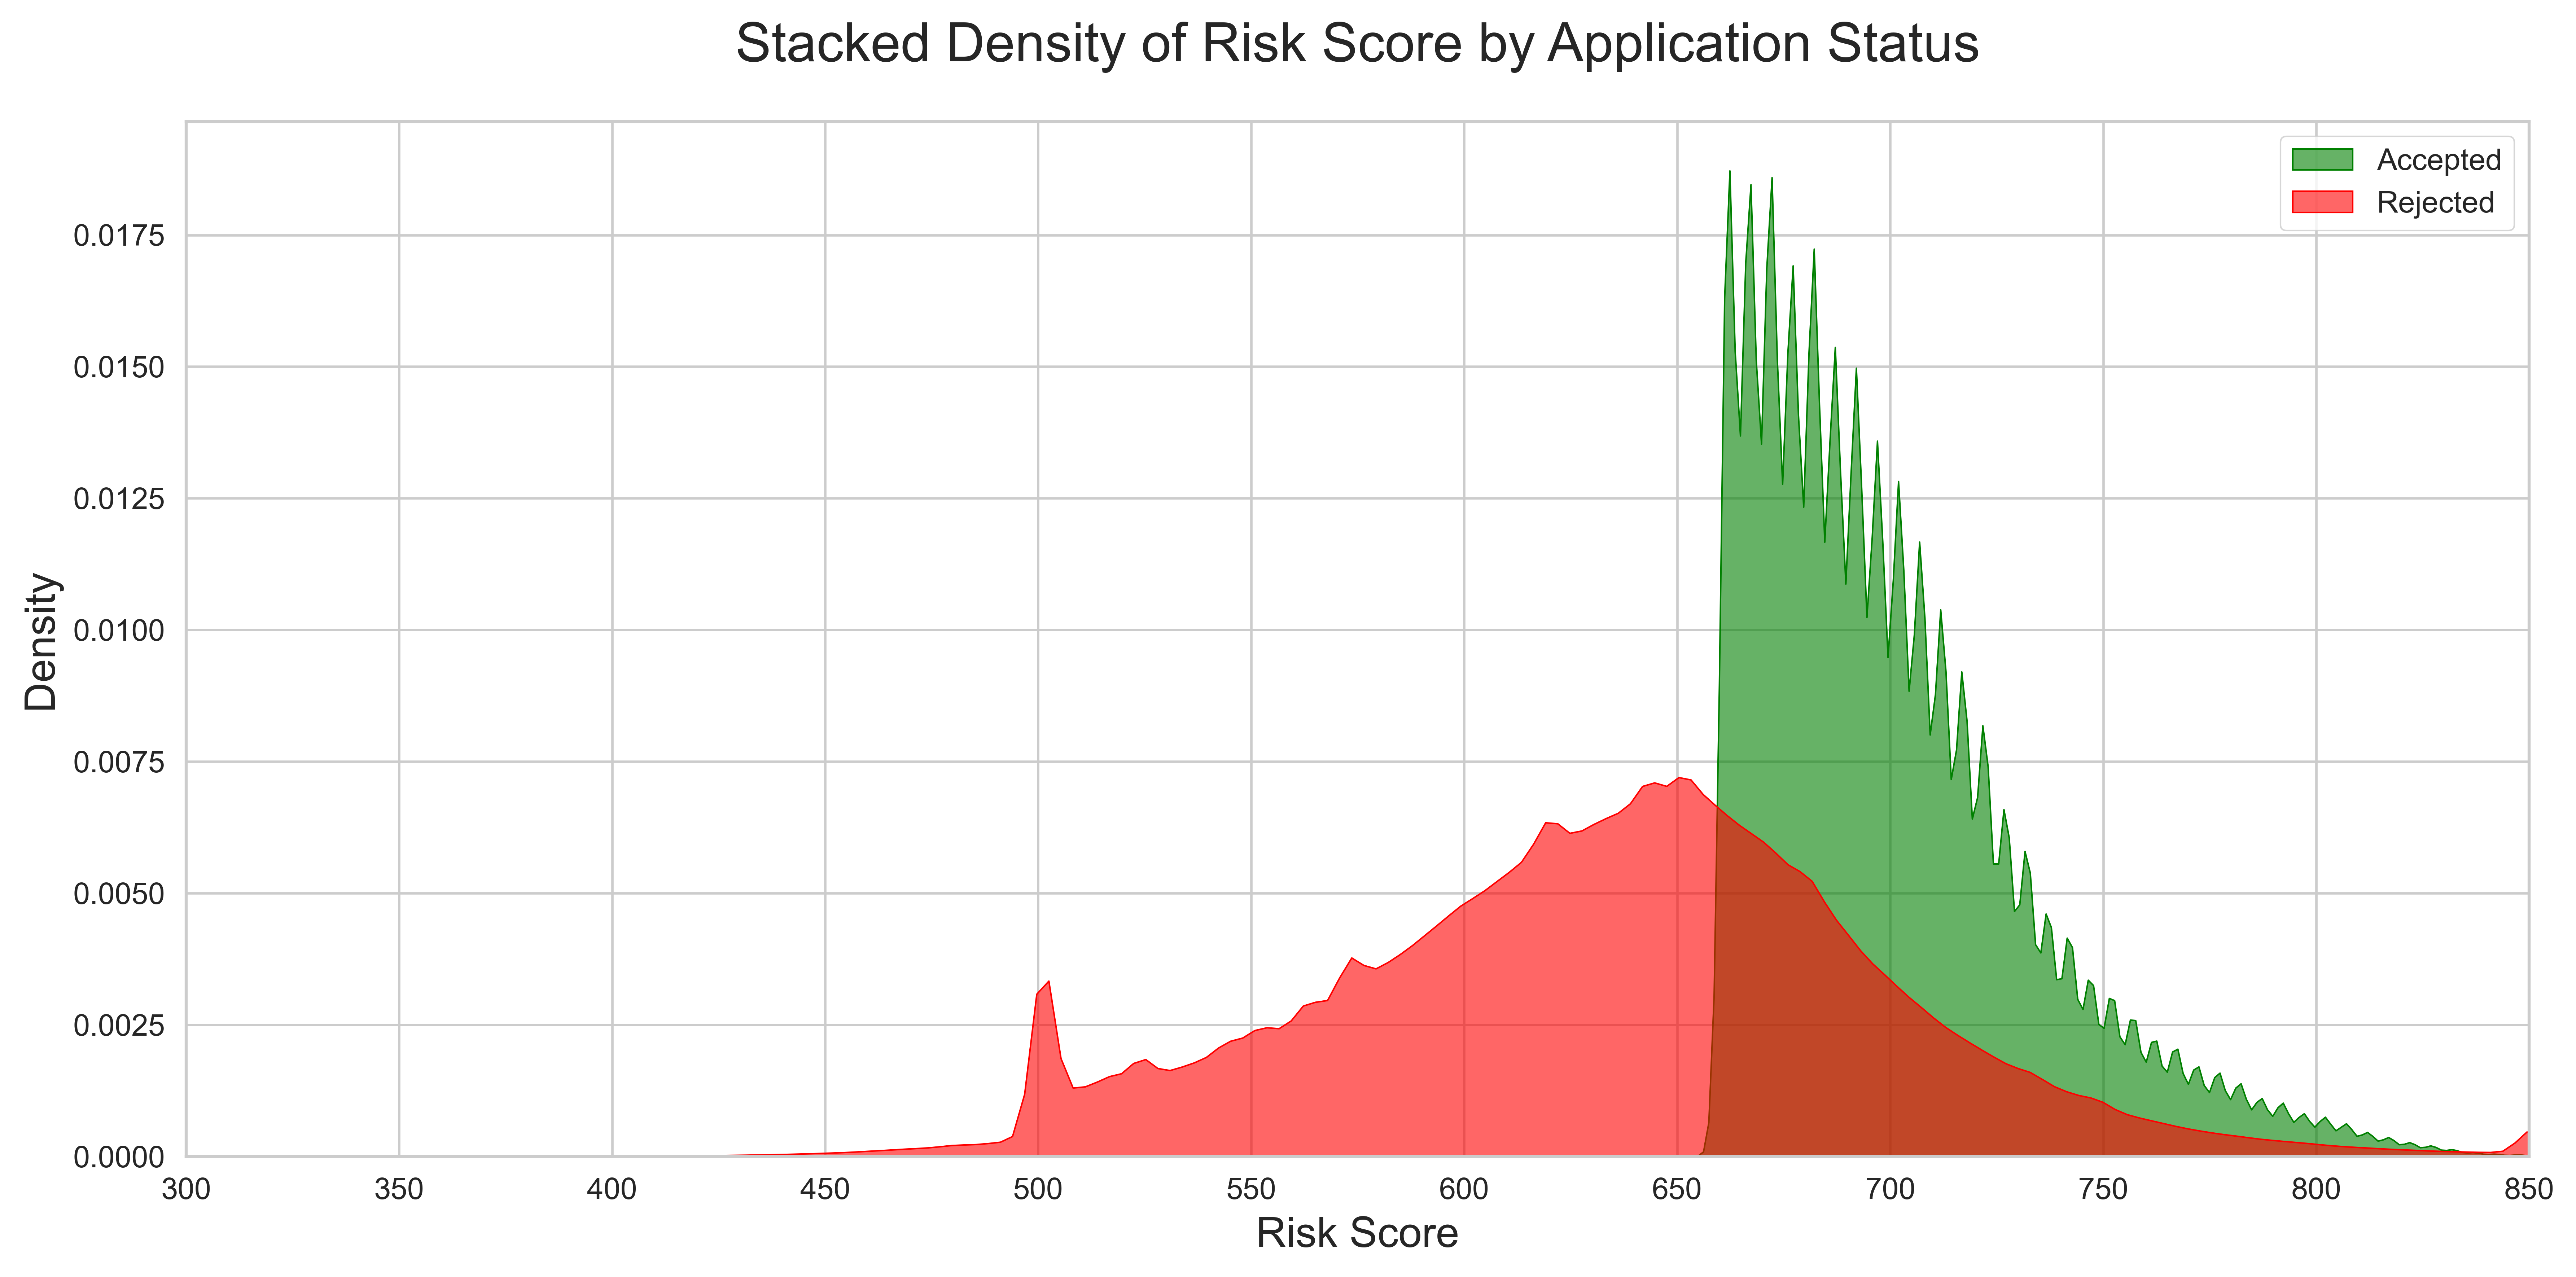

In [118]:
#Stacked Density- Accepted vs Rejected by Risk Score
sns.set_style('whitegrid')
plt.figure(figsize=(12, 6), dpi=600)

sns.kdeplot(
    data=Accepted_Rejected[Accepted_Rejected['Application'] == 'Accepted'],
    x='Risk_Score',
    fill=True,
    label='Accepted',
    color='green',
    alpha=0.6
)
sns.kdeplot(
    data=Accepted_Rejected[Accepted_Rejected['Application'] == 'Rejected'],
    x='Risk_Score',
    fill=True,
    label='Rejected',
    color='red',
    alpha=0.6
)

plt.title('Stacked Density of Risk Score by Application Status', fontsize=18, pad=20)
plt.xlabel('Risk Score', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(title='')
plt.xlim(300, 850)
plt.gca().xaxis.set_major_locator(MultipleLocator(50))
plt.tight_layout()
plt.show()

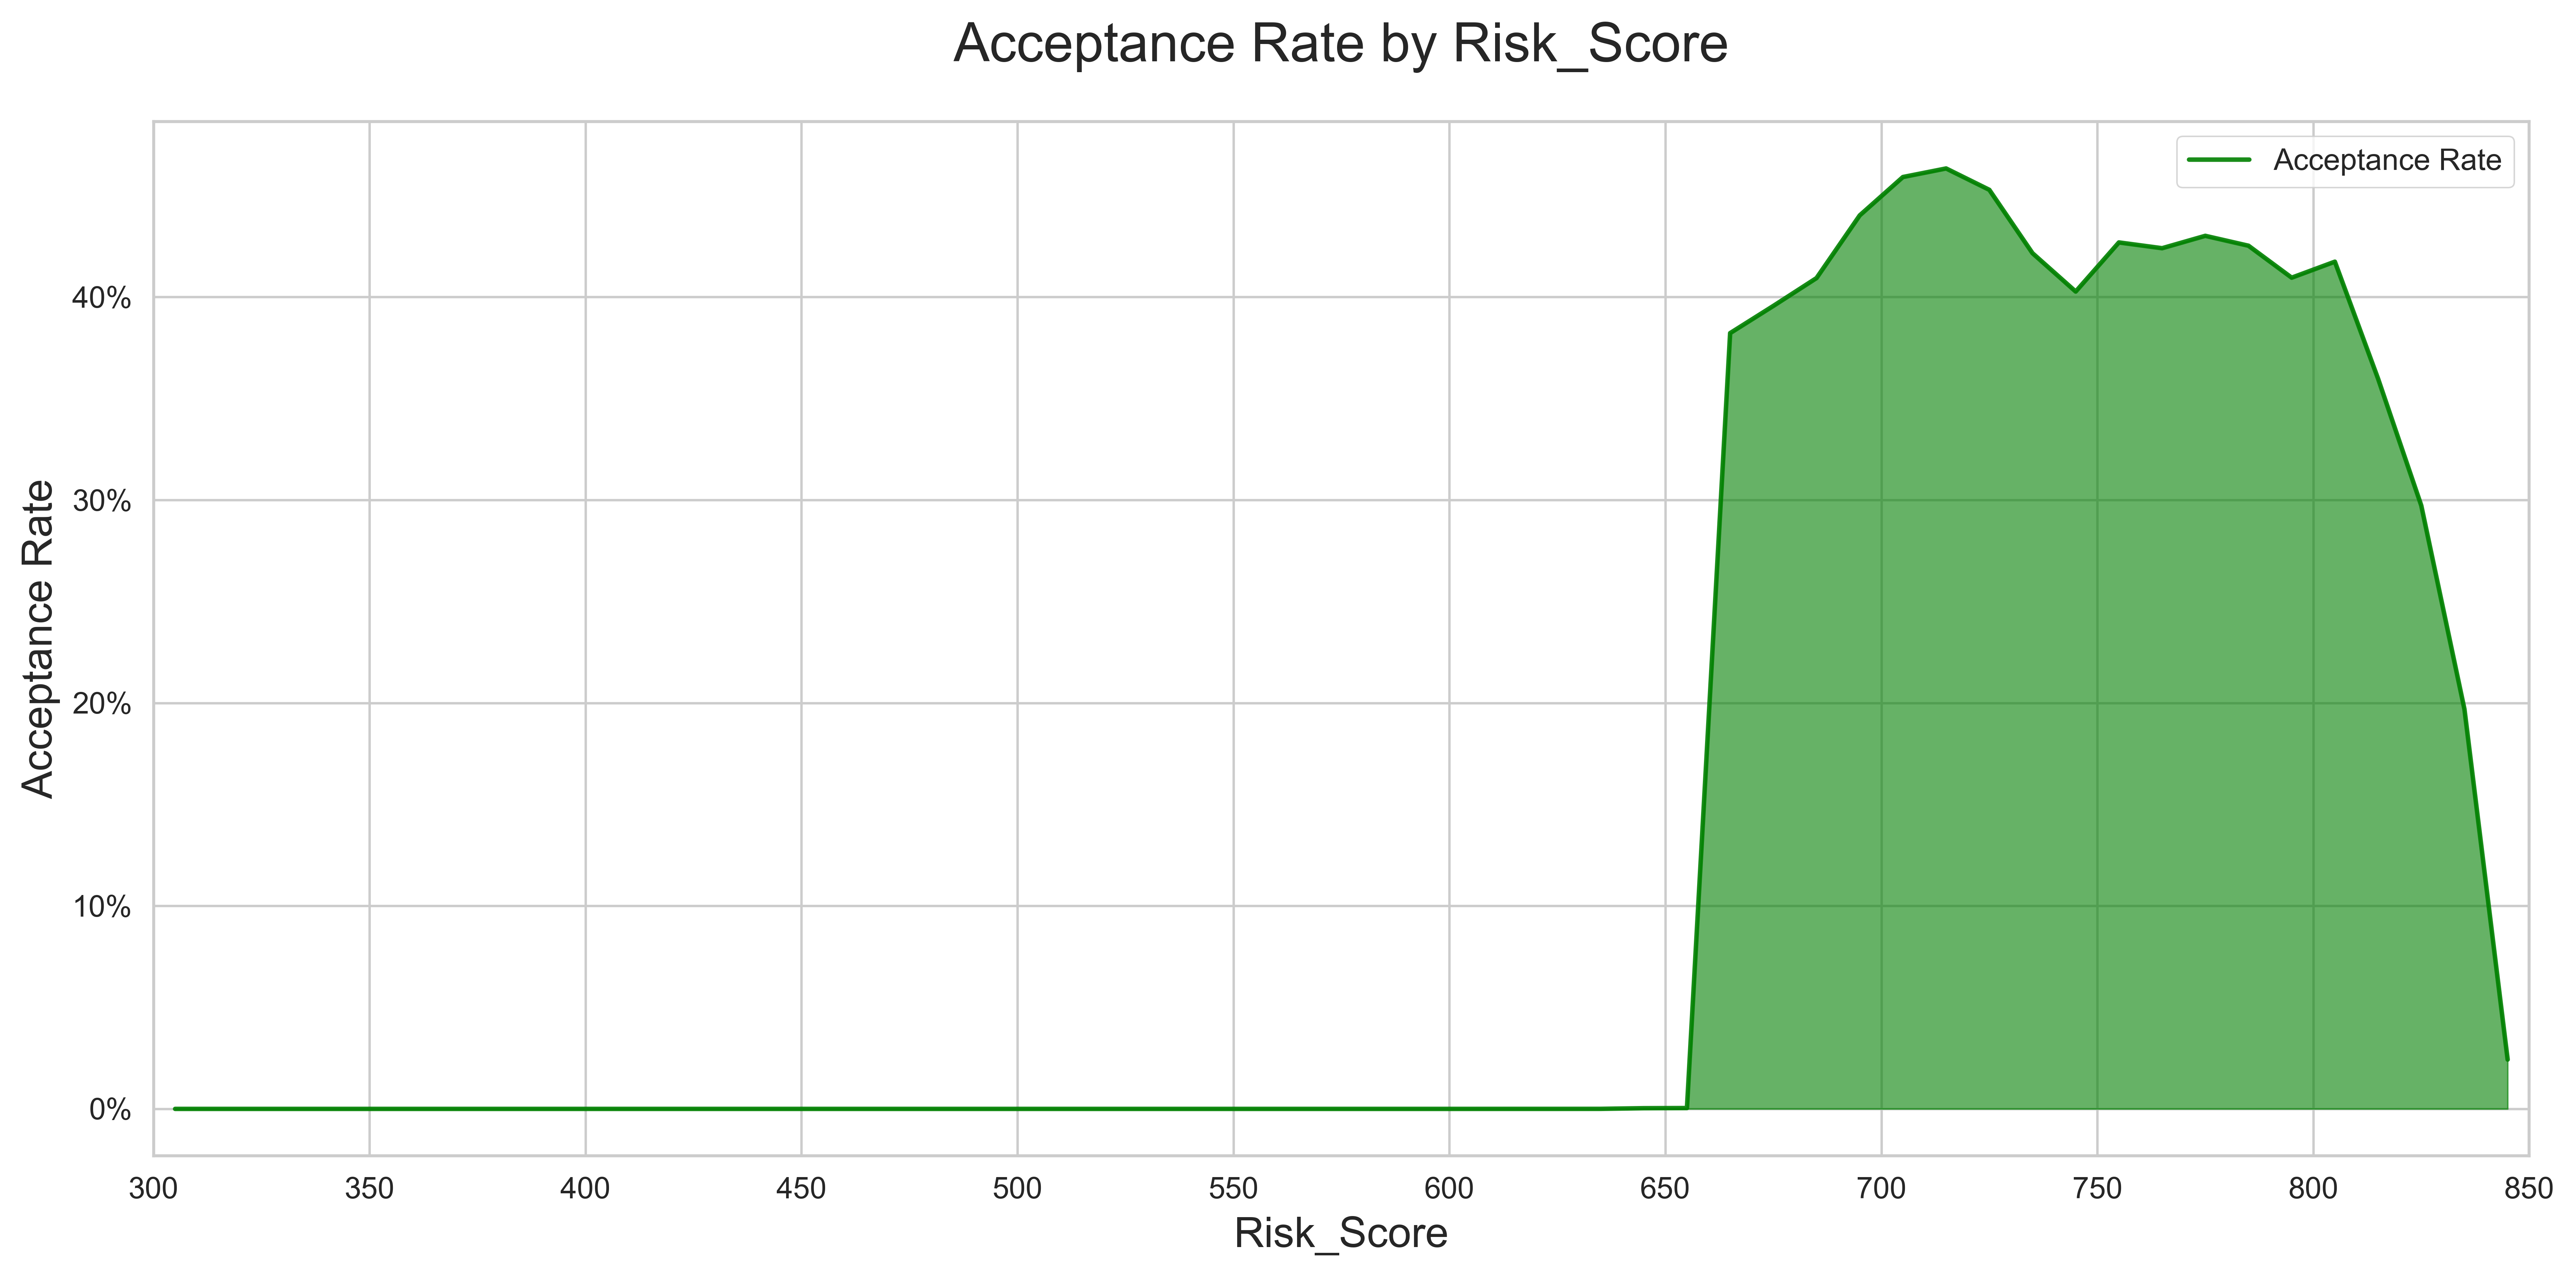

In [119]:
#Bin ACCEPTANCE RATE by Risk Score
col = 'Risk_Score'

bins = np.arange(300, 851, 10)
Accepted_Rejected['Bin'] = pd.cut(Accepted_Rejected[col], bins)

#Calculate acceptance rate per bin
rate_df = Accepted_Rejected.groupby('Bin', observed=False)['Application'].value_counts().unstack(fill_value=0)
rate_df['Acceptance_Rate'] = rate_df.get('Accepted', 0) / (rate_df.get('Accepted', 0) + rate_df.get('Rejected', 0))

#Use bin midpoints for plotting
bin_midpoints = [interval.mid for interval in rate_df.index]

sns.set_style('whitegrid')
plt.figure(figsize=(12, 6), dpi=600)

plt.fill_between(bin_midpoints, rate_df['Acceptance_Rate'], color='green', alpha=0.6)
plt.plot(bin_midpoints, rate_df['Acceptance_Rate'], color='green', alpha=0.9, label='Acceptance Rate')

plt.title(f'Acceptance Rate by {col}', fontsize=18, pad=20)
plt.xlabel(col, fontsize=14)
plt.ylabel('Acceptance Rate', fontsize=14)
plt.xlim(300, 850)
plt.gca().xaxis.set_major_locator(MultipleLocator(50))
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{int(y*100)}%'))
plt.legend(title='')
plt.tight_layout()
plt.show()

C:\Users\edjwe\AppData\Local\Temp\ipykernel_3012\1738615606.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data=Accepted_Rejected_trimmed[Accepted_Rejected['Application'] == 'Accepted'],
C:\Users\edjwe\AppData\Local\Temp\ipykernel_3012\1738615606.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data=Accepted_Rejected_trimmed[Accepted_Rejected['Application'] == 'Rejected'],


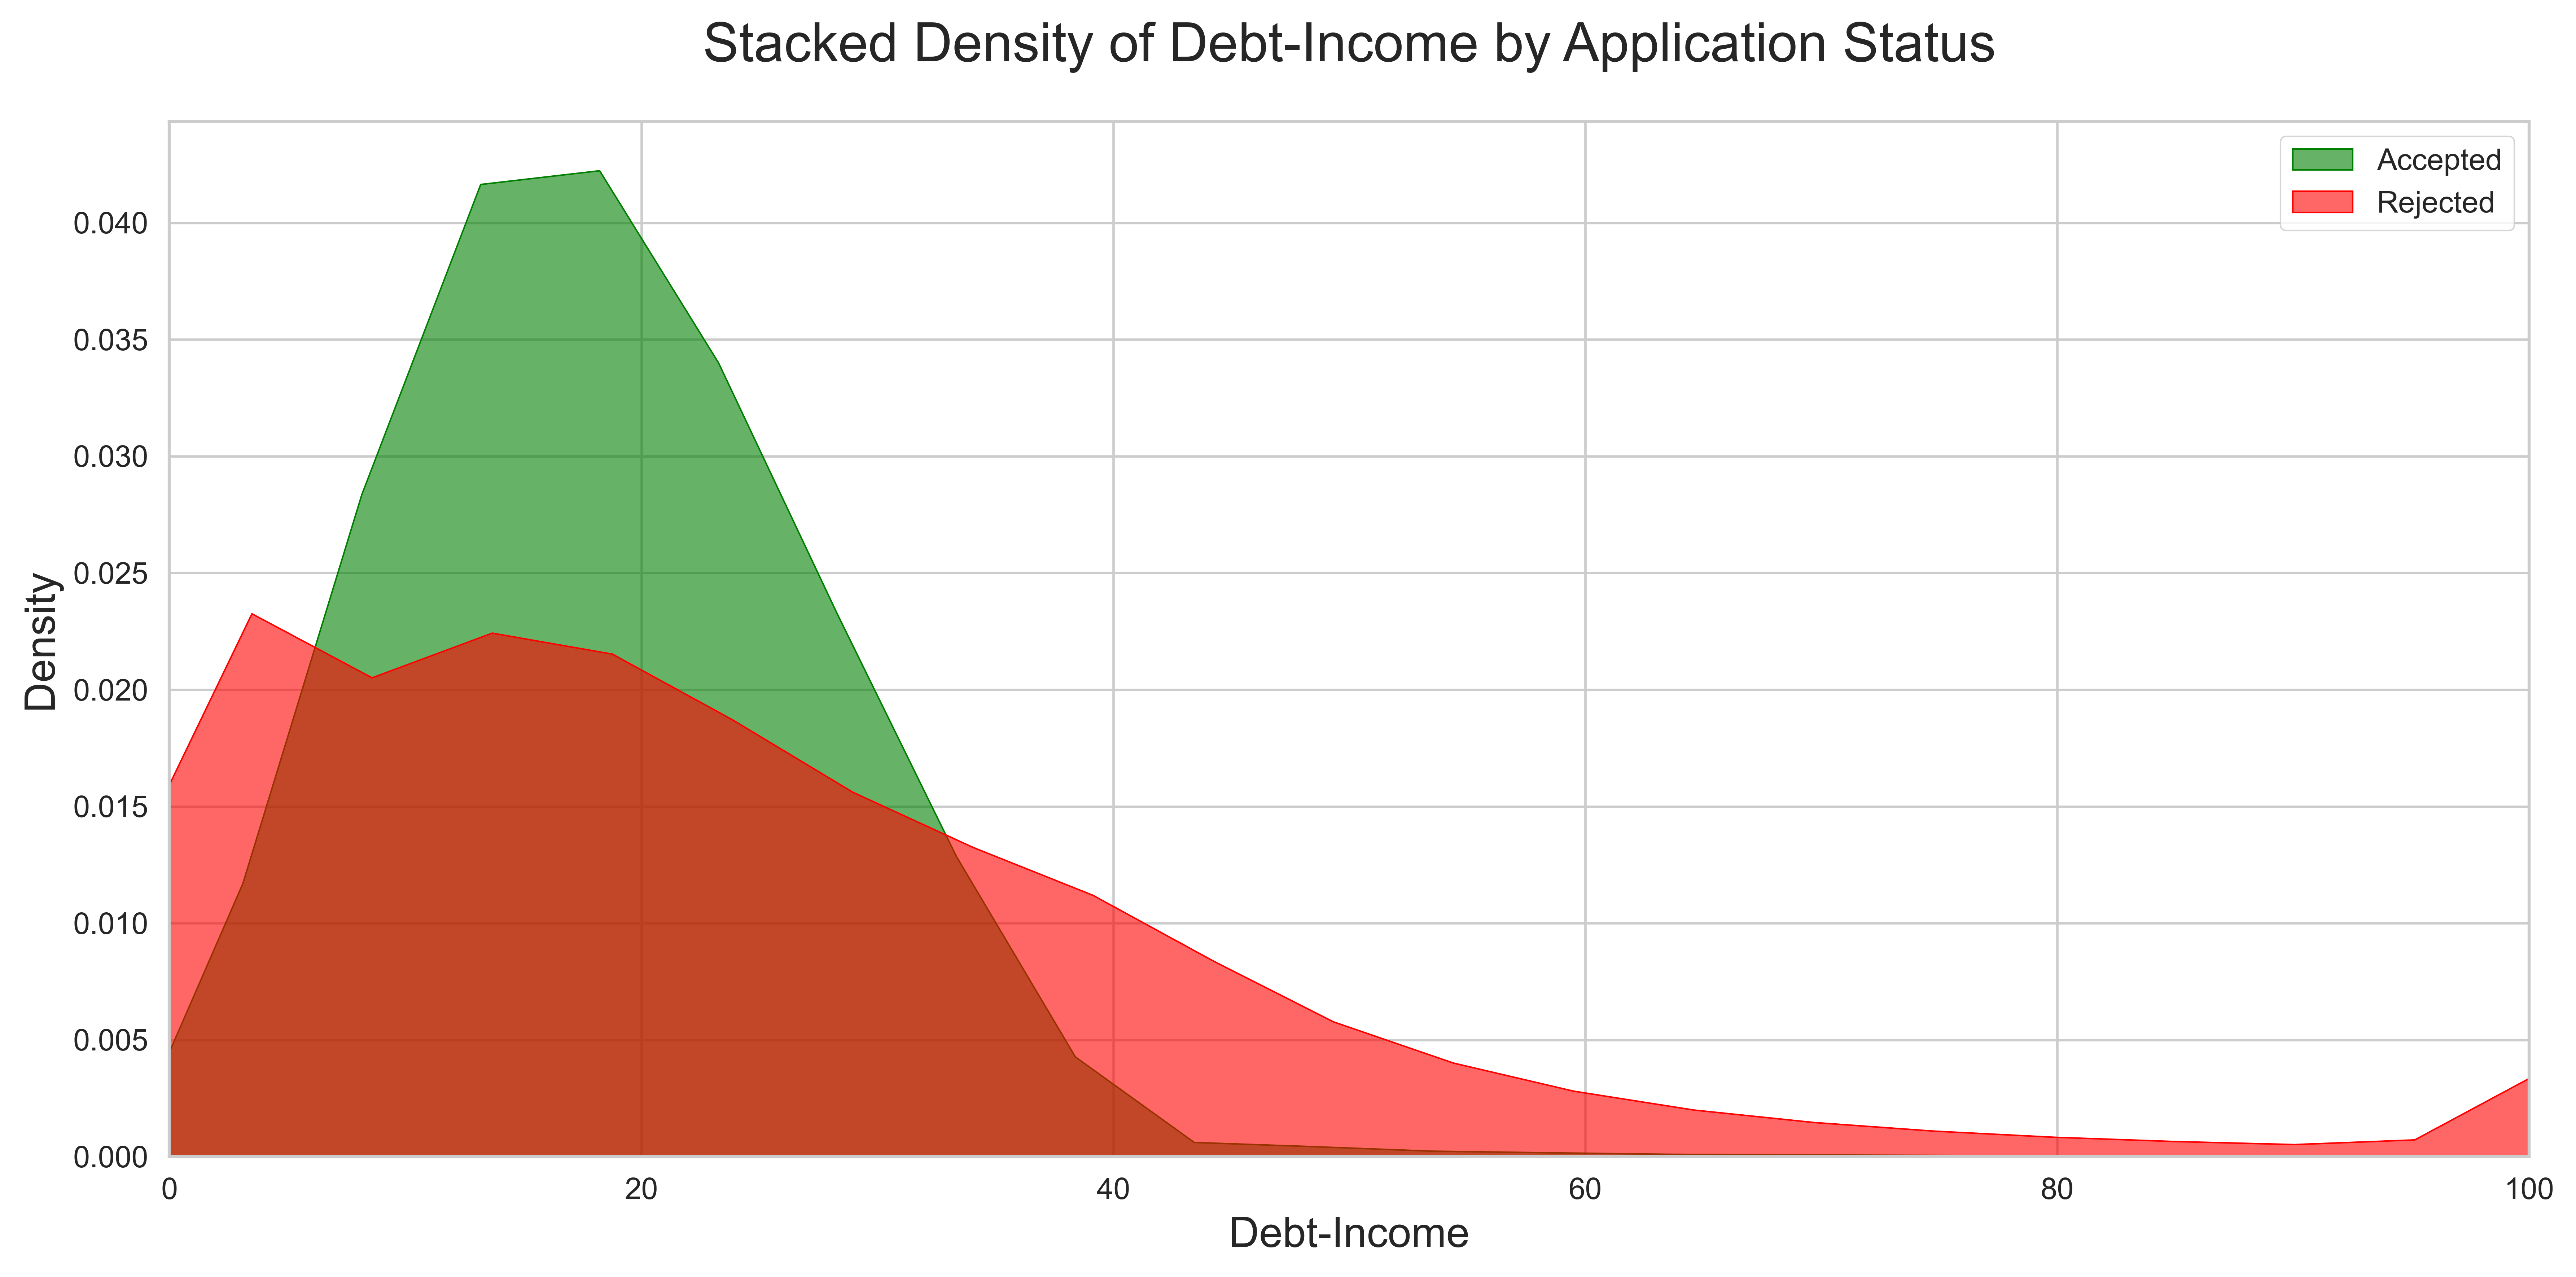

In [120]:
#Stacked Density- Accepted vs Rejected by Debt-Income
sns.set_style('whitegrid')
plt.figure(figsize=(12, 6), dpi=600)

Accepted_Rejected_trimmed = Accepted_Rejected[Accepted_Rejected['Debt-Income'] < 1000]
sns.kdeplot(
    data=Accepted_Rejected_trimmed[Accepted_Rejected['Application'] == 'Accepted'],
    x='Debt-Income',
    fill=True,
    label='Accepted',
    color='green',
    alpha=0.6
)
sns.kdeplot(
    data=Accepted_Rejected_trimmed[Accepted_Rejected['Application'] == 'Rejected'],
    x='Debt-Income',
    fill=True,
    label='Rejected',
    color='red',
    alpha=0.6
)

plt.title('Stacked Density of Debt-Income by Application Status', fontsize=18, pad=20)
plt.xlabel('Debt-Income', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(title='')
plt.xlim(0, 100)
#plt.gca().xaxis.set_major_locator(MultipleLocator(50))
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.tight_layout()
plt.show()

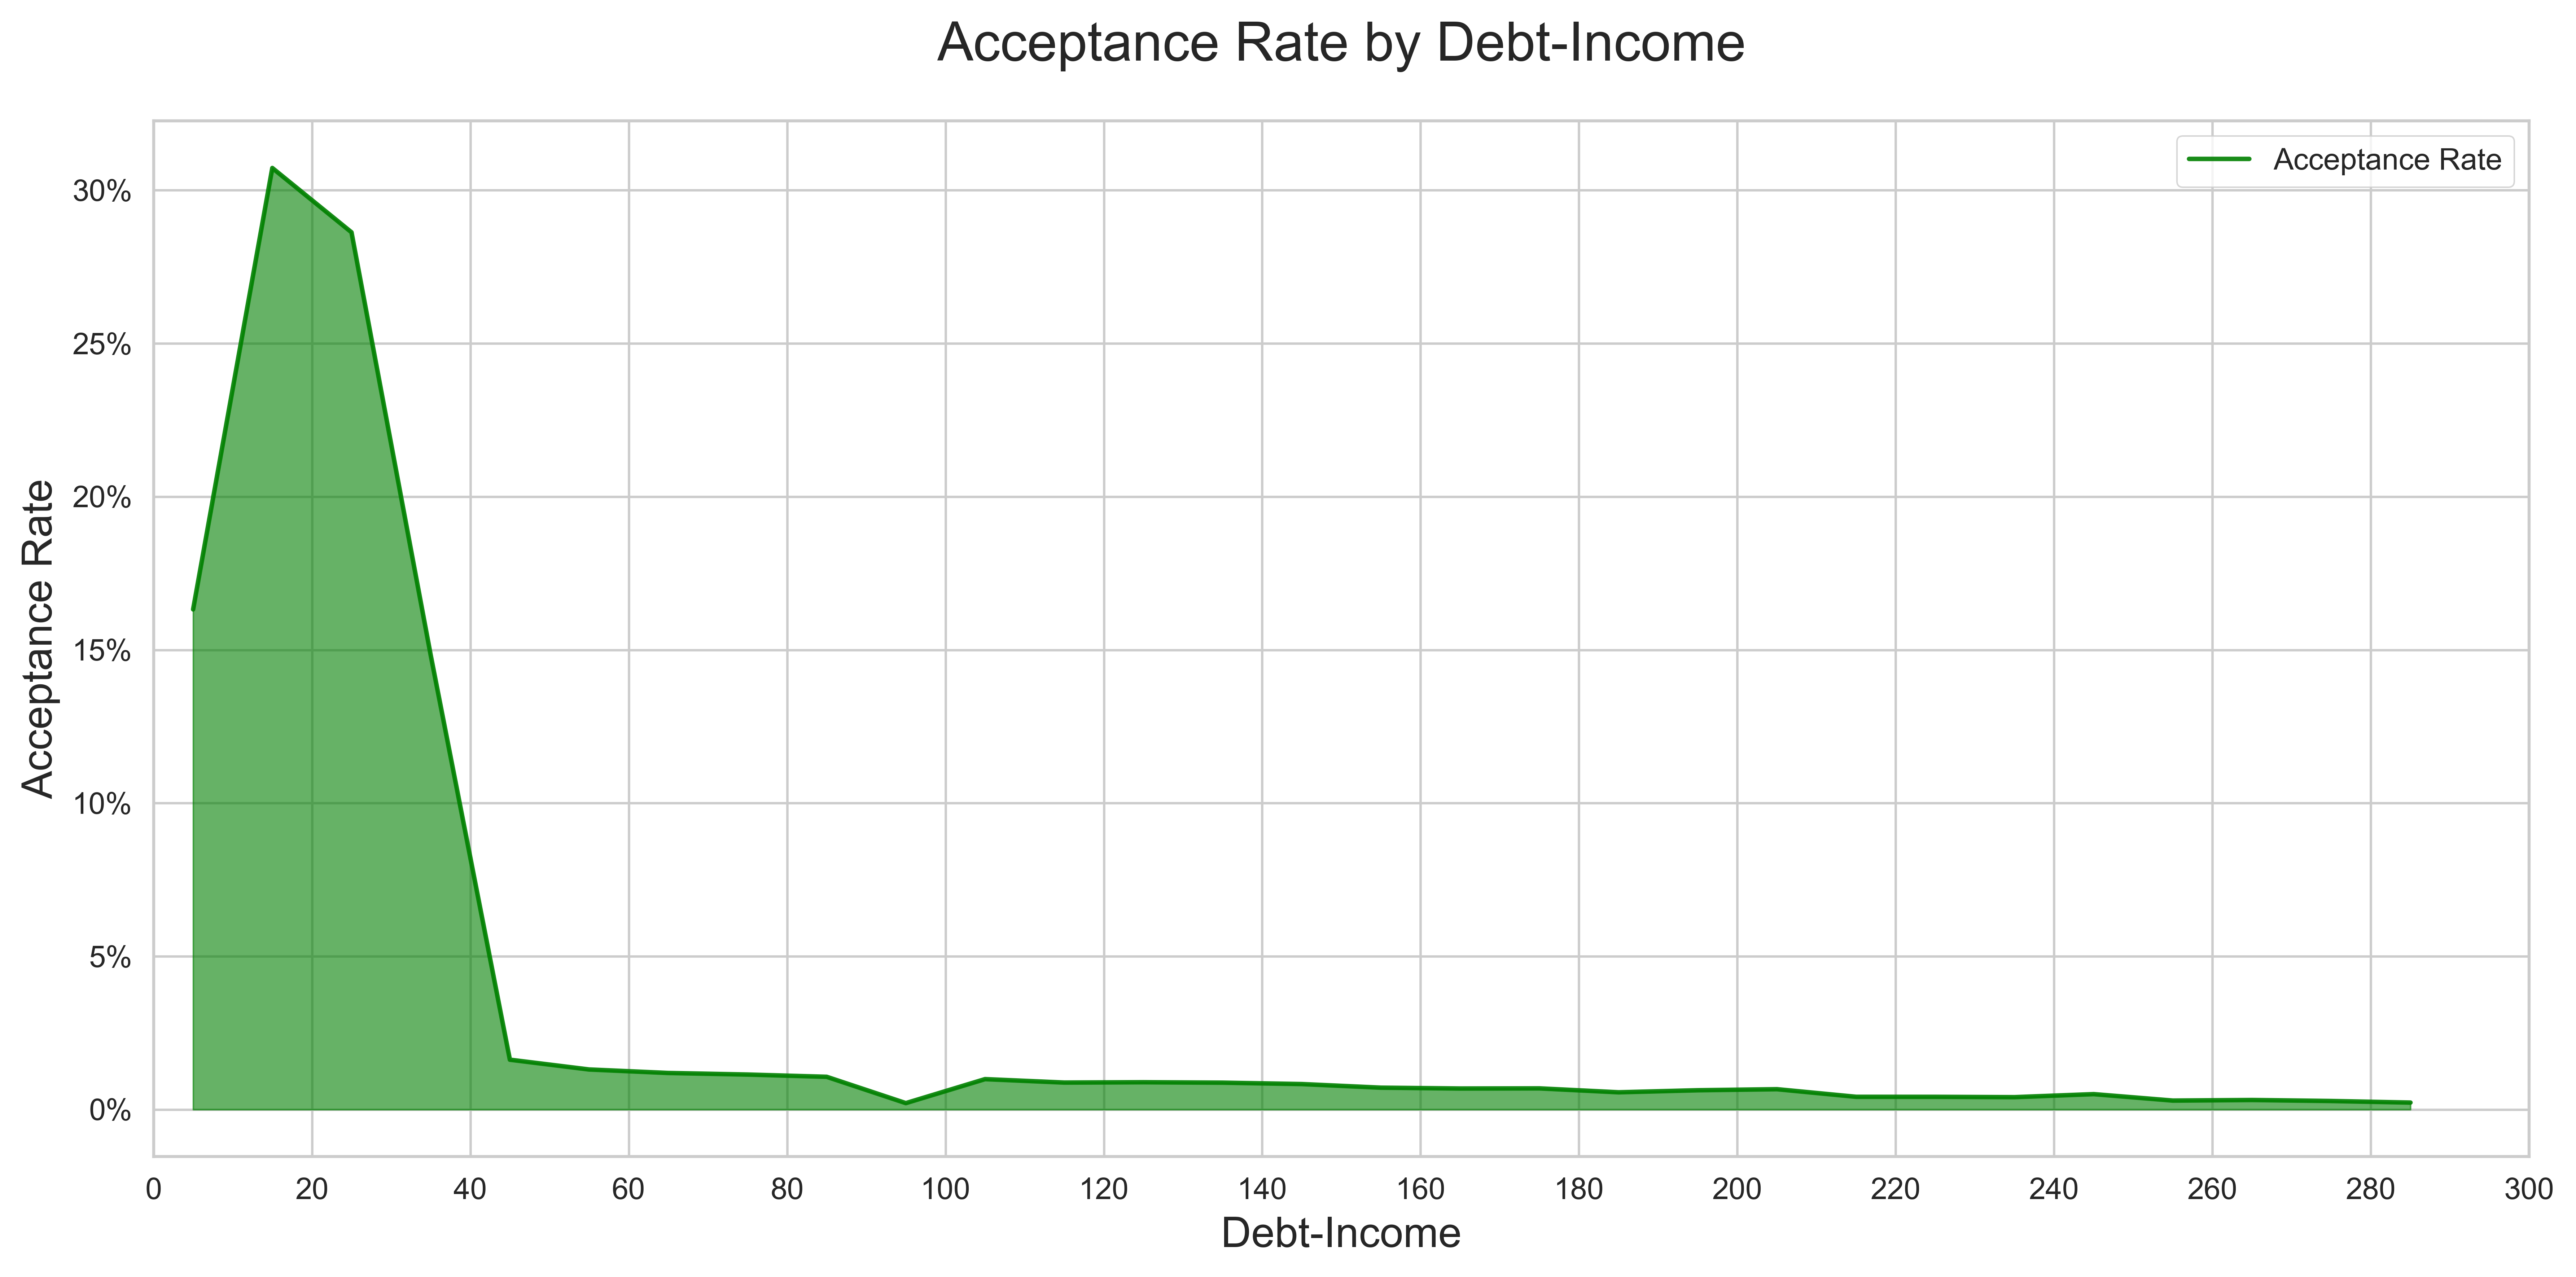

In [121]:
#Bin ACCEPTANCE RATE by Risk Score
col = 'Debt-Income'

bins = np.arange(0, 300, 10)
Accepted_Rejected['Bin'] = pd.cut(Accepted_Rejected[col], bins)

#Calculate acceptance rate per bin
rate_df = Accepted_Rejected.groupby('Bin', observed=False)['Application'].value_counts().unstack(fill_value=0)
rate_df['Acceptance_Rate'] = rate_df.get('Accepted', 0) / (rate_df.get('Accepted', 0) + rate_df.get('Rejected', 0))

#Use bin midpoints for plotting
bin_midpoints = [interval.mid for interval in rate_df.index]

sns.set_style('whitegrid')
plt.figure(figsize=(12, 6), dpi=600)

plt.fill_between(bin_midpoints, rate_df['Acceptance_Rate'], color='green', alpha=0.6)
plt.plot(bin_midpoints, rate_df['Acceptance_Rate'], color='green', alpha=0.9, label='Acceptance Rate')

plt.title(f'Acceptance Rate by {col}', fontsize=18, pad=20)
plt.xlabel(col, fontsize=14)
plt.ylabel('Acceptance Rate', fontsize=14)
plt.xlim(0, 300)
plt.gca().xaxis.set_major_locator(MultipleLocator(20))
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{int(y*100)}%'))
plt.legend(title='')
plt.tight_layout()
plt.show()

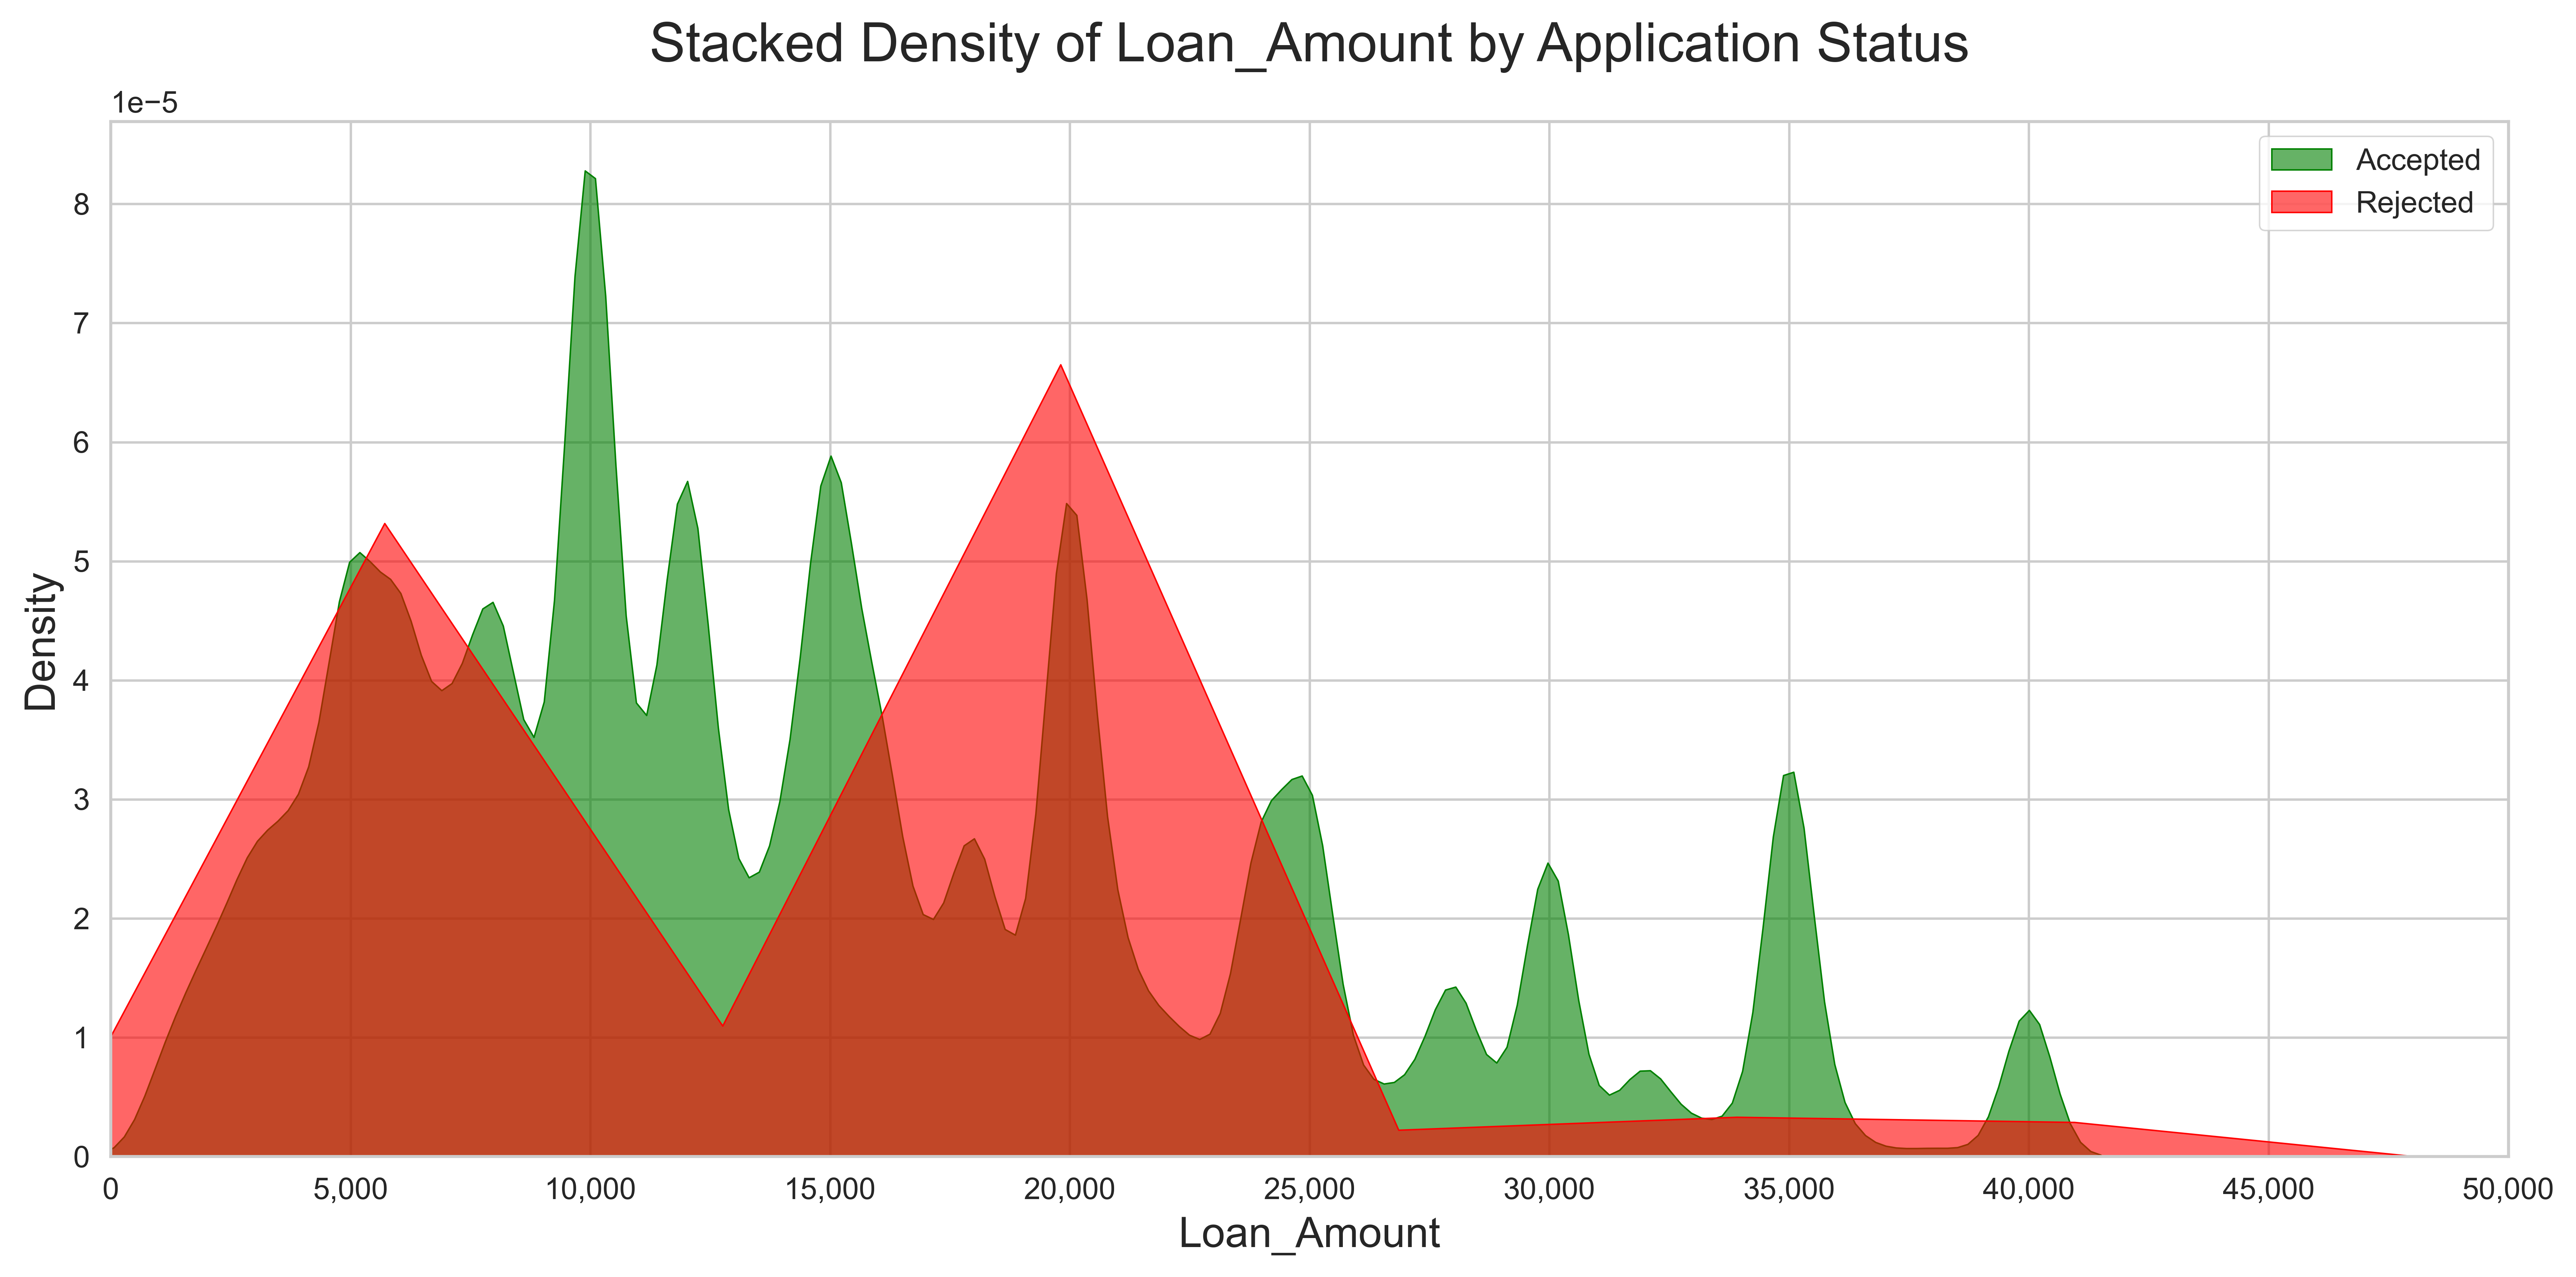

In [122]:
#Stacked Density- Accepted vs Rejected by Loan Amount
sns.set_style('whitegrid')
plt.figure(figsize=(12, 6), dpi=600)

sns.kdeplot(
    data=Accepted_Rejected[Accepted_Rejected['Application'] == 'Accepted'],
    x='Loan_Amount',
    fill=True,
    label='Accepted',
    color='green',
    alpha=0.6
)
sns.kdeplot(
    data=Accepted_Rejected[Accepted_Rejected['Application'] == 'Rejected'],
    x='Loan_Amount',
    fill=True,
    label='Rejected',
    color='red',
    alpha=0.6
)

plt.title('Stacked Density of Loan_Amount by Application Status', fontsize=18, pad=20)
plt.xlabel('Loan_Amount', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(title='')
plt.xlim(0, 50000)
plt.gca().xaxis.set_major_locator(MultipleLocator(5000))
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.tight_layout()
plt.show()

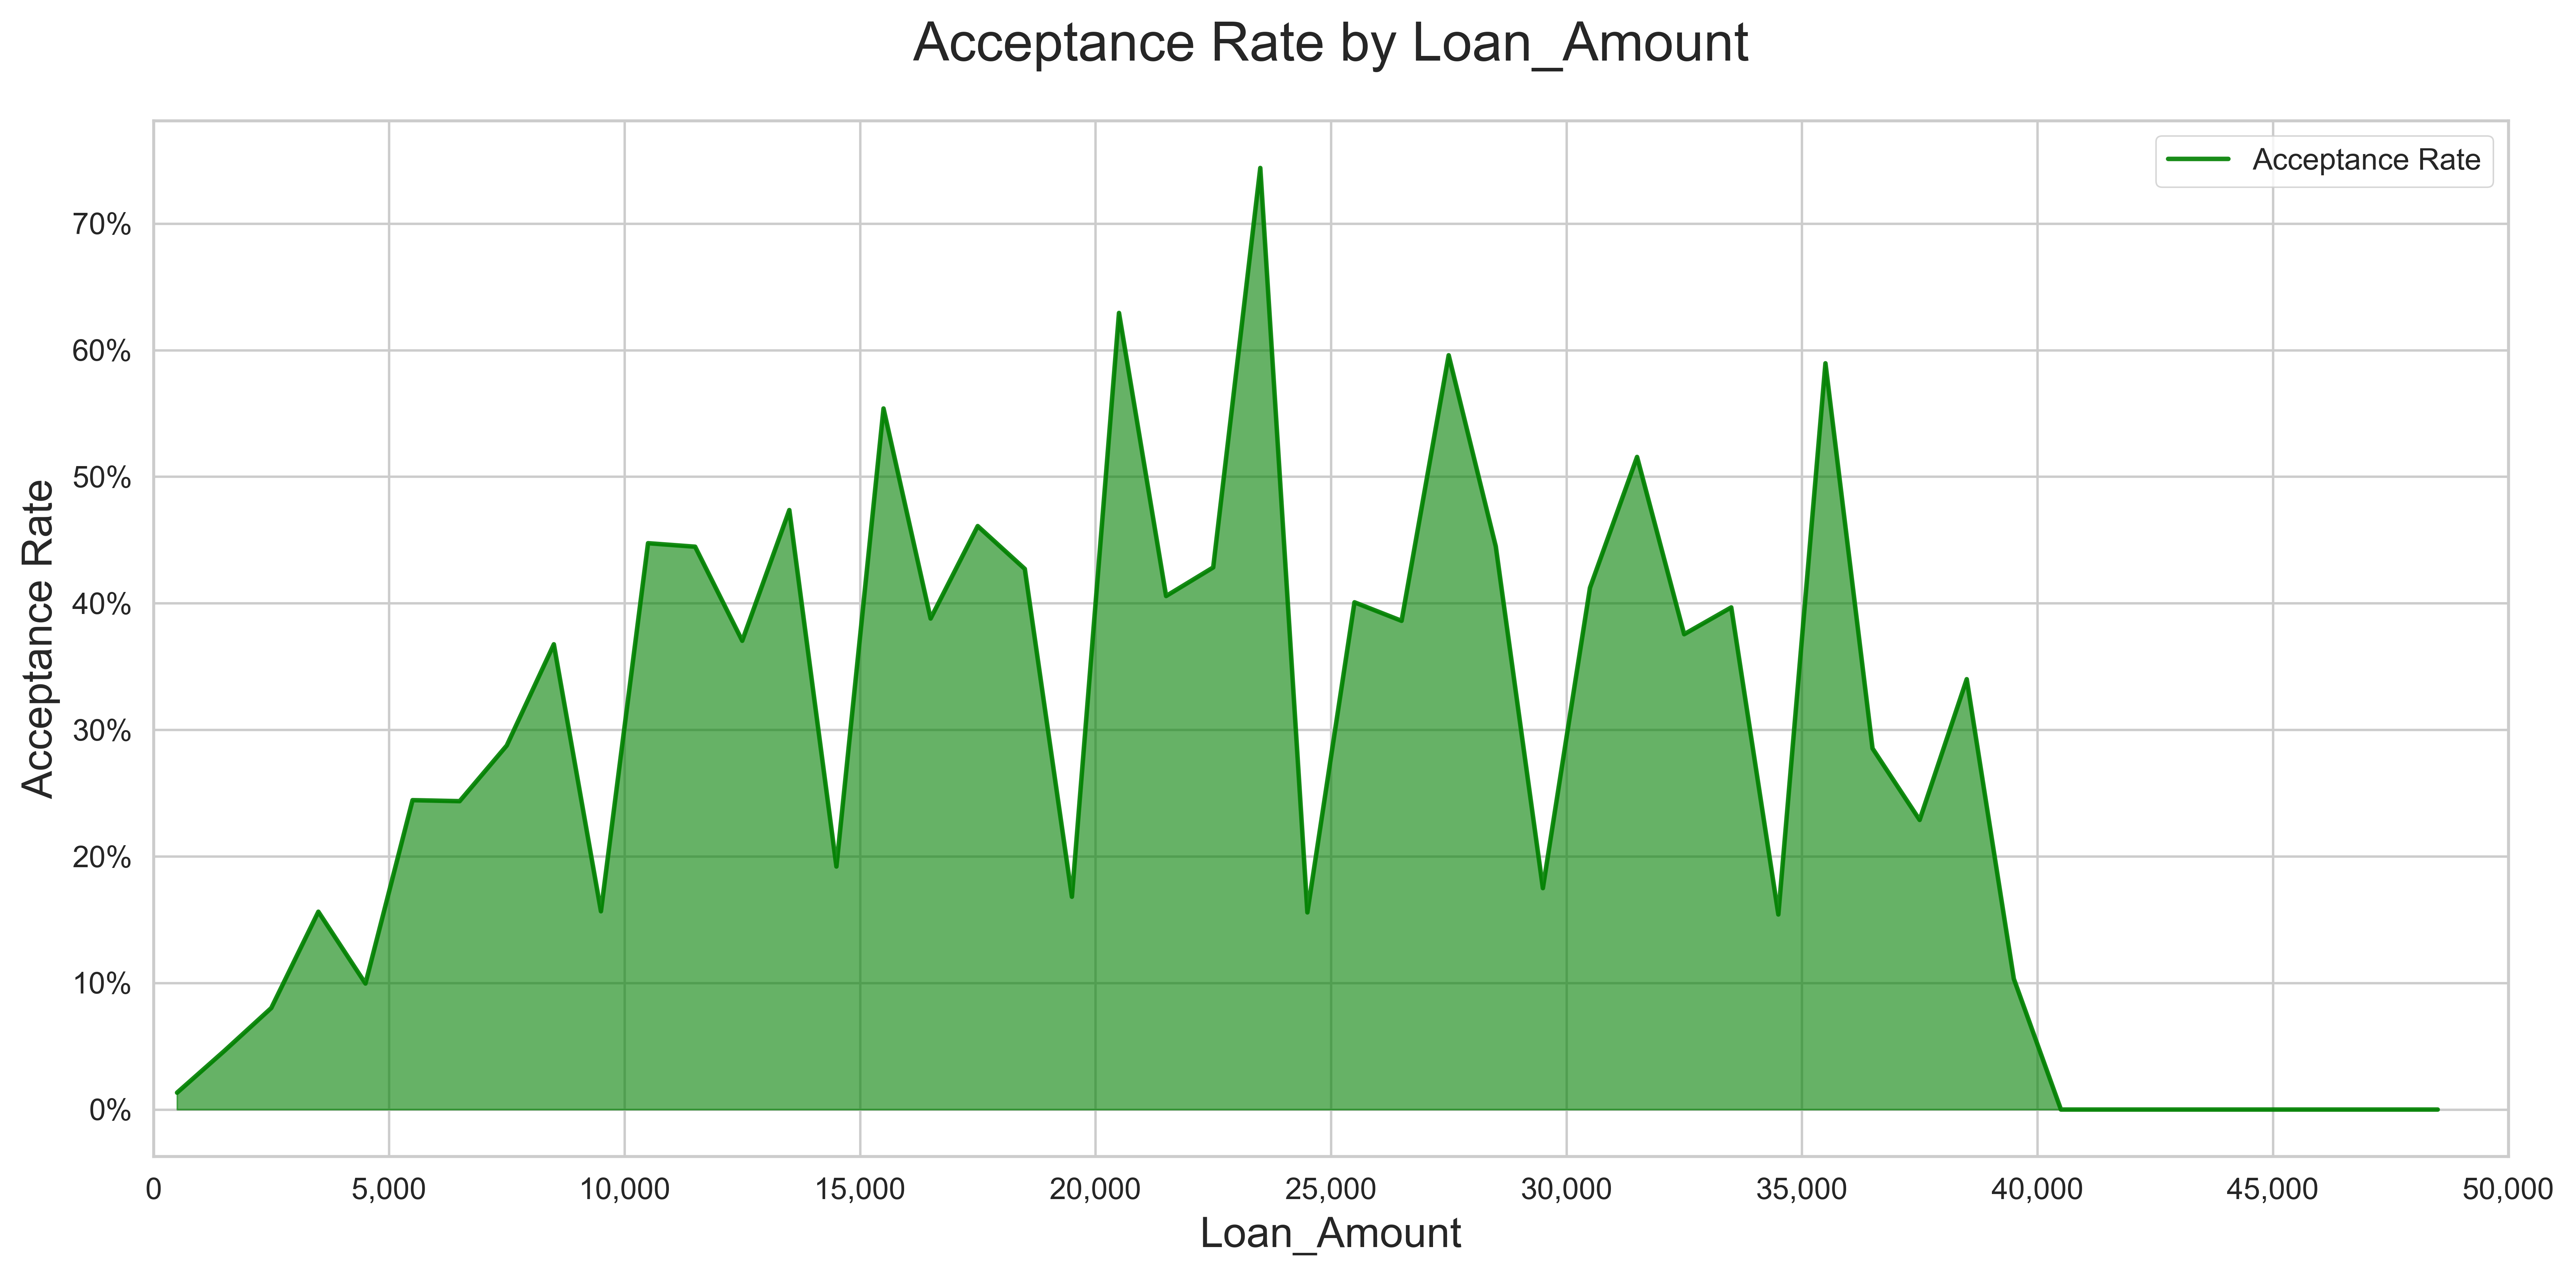

In [123]:
#Bin ACCEPTANCE RATE by Loan Amount
col = 'Loan_Amount'

bins = np.arange(0, 50000, 1000)
Accepted_Rejected['Bin'] = pd.cut(Accepted_Rejected[col], bins)

#Calculate acceptance rate per bin
rate_df = Accepted_Rejected.groupby('Bin', observed=False)['Application'].value_counts().unstack(fill_value=0)
rate_df['Acceptance_Rate'] = rate_df.get('Accepted', 0) / (rate_df.get('Accepted', 0) + rate_df.get('Rejected', 0))

#Use bin midpoints for plotting
bin_midpoints = [interval.mid for interval in rate_df.index]

sns.set_style('whitegrid')
plt.figure(figsize=(12, 6), dpi=600)

plt.fill_between(bin_midpoints, rate_df['Acceptance_Rate'], color='green', alpha=0.6)
plt.plot(bin_midpoints, rate_df['Acceptance_Rate'], color='green', alpha=0.9, label='Acceptance Rate')

plt.title(f'Acceptance Rate by {col}', fontsize=18, pad=20)
plt.xlabel(col, fontsize=14)
plt.ylabel('Acceptance Rate', fontsize=14)
plt.xlim(0, 50000)
plt.gca().xaxis.set_major_locator(MultipleLocator(5000))
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{int(y*100)}%'))
plt.legend(title='')
plt.tight_layout()
plt.show()

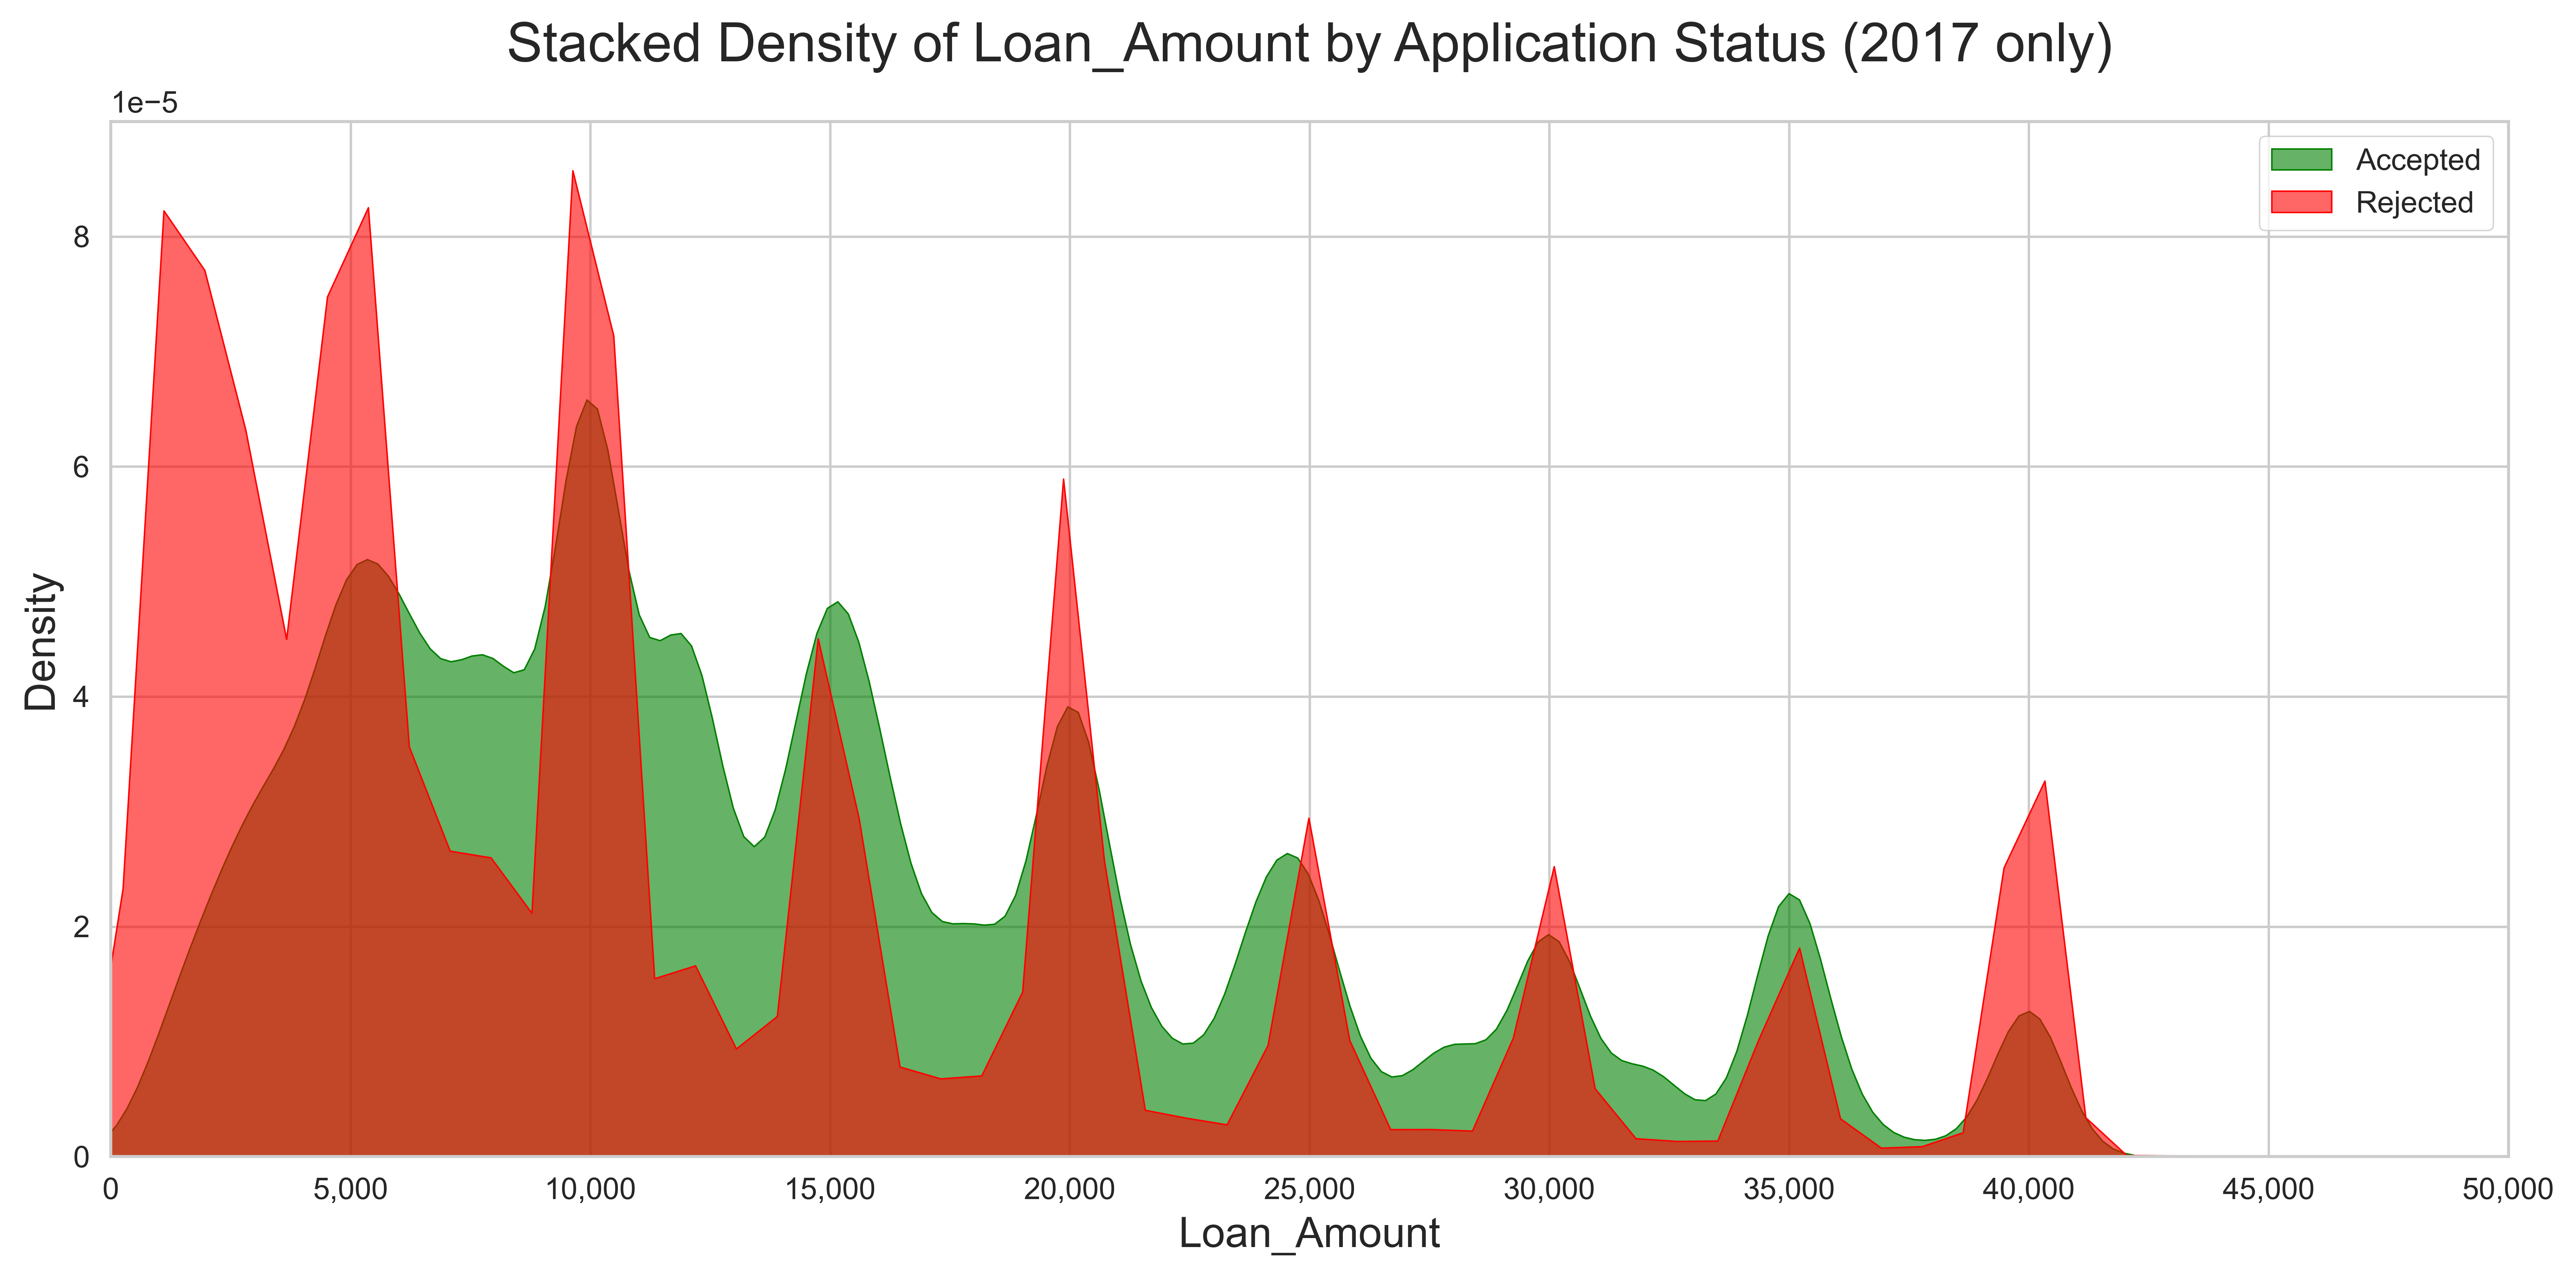

In [124]:
#Stacked Density- Accepted vs Rejected by Loan Amount (2017 only)
sns.set_style('whitegrid')
plt.figure(figsize=(12, 6), dpi=600)

sns.kdeplot(
    data=Accepted_Rejected_2017[Accepted_Rejected_2017['Application'] == 'Accepted'],
    x='Loan_Amount',
    fill=True,
    label='Accepted',
    color='green',
    alpha=0.6
)
sns.kdeplot(
    data=Accepted_Rejected_2017[Accepted_Rejected_2017['Application'] == 'Rejected'],
    x='Loan_Amount',
    fill=True,
    label='Rejected',
    color='red',
    alpha=0.6
)

plt.title('Stacked Density of Loan_Amount by Application Status (2017 only)', fontsize=18, pad=20)
plt.xlabel('Loan_Amount', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(title='')
plt.xlim(0, 50000)
plt.gca().xaxis.set_major_locator(MultipleLocator(5000))
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.tight_layout()
plt.show()

C:\Users\edjwe\AppData\Local\Temp\ipykernel_3012\2778536237.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Accepted_Rejected_2017['Bin'] = pd.cut(Accepted_Rejected_2017[col], bins)


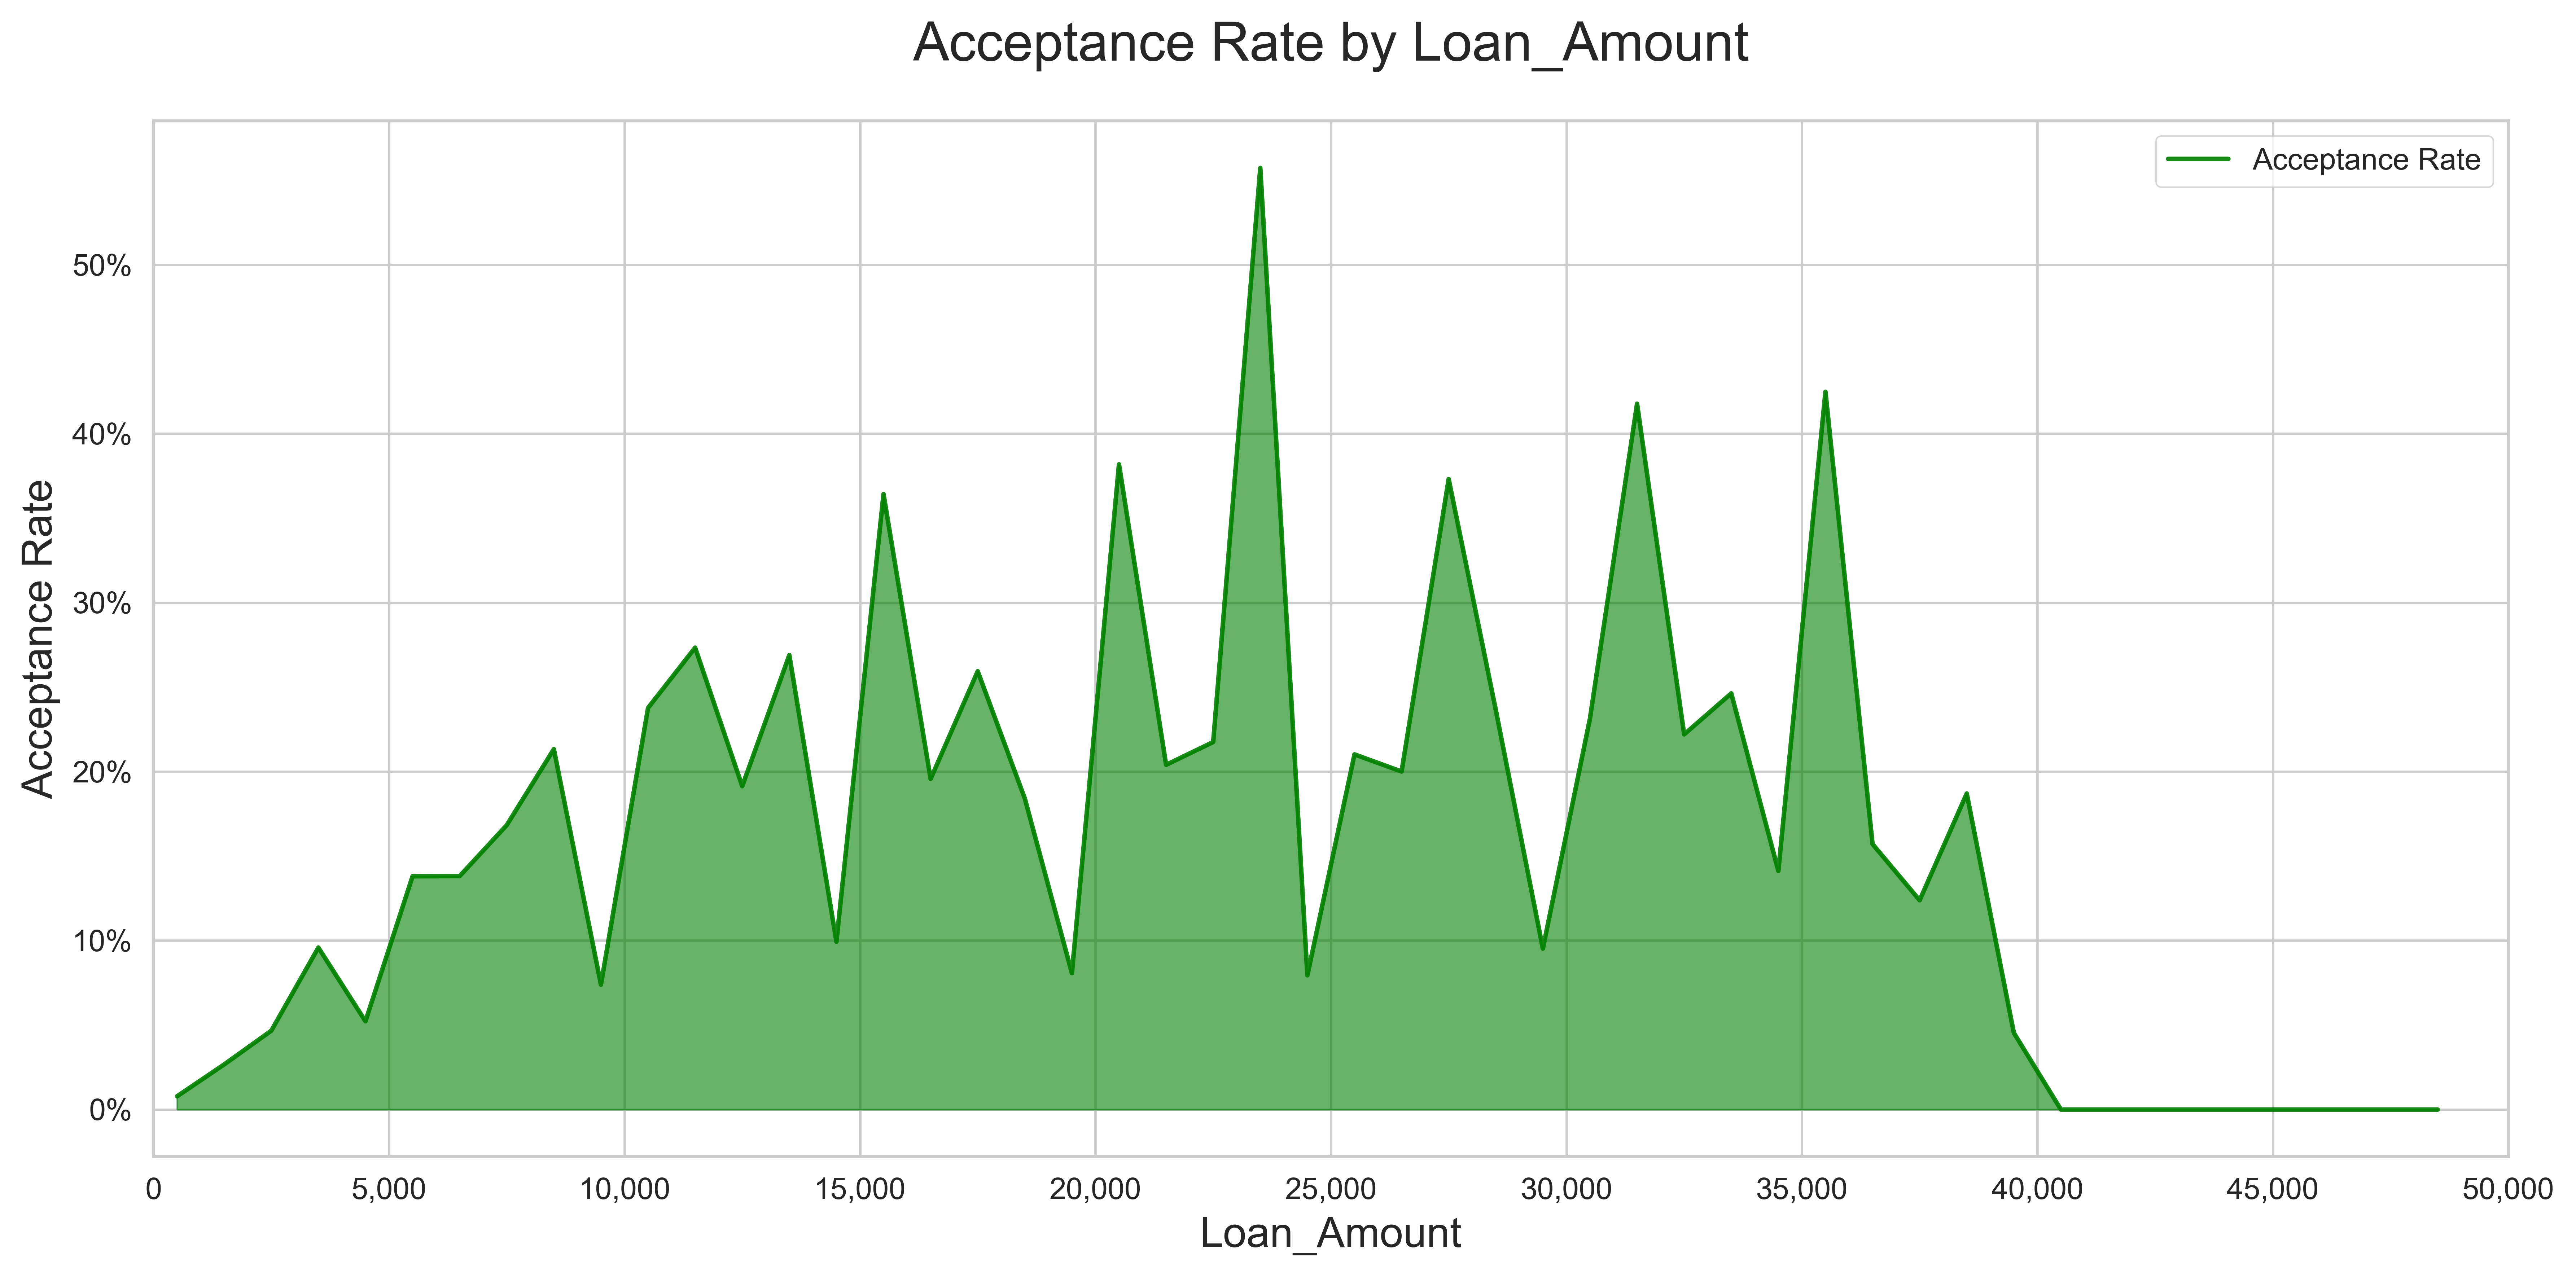

In [125]:
#Bin ACCEPTANCE RATE by Loan Amount (2017 only)
col = 'Loan_Amount'

bins = np.arange(0, 50000, 1000)
Accepted_Rejected_2017['Bin'] = pd.cut(Accepted_Rejected_2017[col], bins)

#Calculate acceptance rate per bin
rate_df = Accepted_Rejected_2017.groupby('Bin', observed=False)['Application'].value_counts().unstack(fill_value=0)
rate_df['Acceptance_Rate'] = rate_df.get('Accepted', 0) / (rate_df.get('Accepted', 0) + rate_df.get('Rejected', 0))

#Use bin midpoints for plotting
bin_midpoints = [interval.mid for interval in rate_df.index]

sns.set_style('whitegrid')
plt.figure(figsize=(12, 6), dpi=600)

plt.fill_between(bin_midpoints, rate_df['Acceptance_Rate'], color='green', alpha=0.6)
plt.plot(bin_midpoints, rate_df['Acceptance_Rate'], color='green', alpha=0.9, label='Acceptance Rate')

plt.title(f'Acceptance Rate by {col} (2017 only)', fontsize=18, pad=20)
plt.xlabel(col, fontsize=14)
plt.ylabel('Acceptance Rate', fontsize=14)
plt.xlim(0, 50000)
plt.gca().xaxis.set_major_locator(MultipleLocator(5000))
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{int(y*100)}%'))
plt.legend(title='')
plt.tight_layout()
plt.show()

In [126]:
#---ACCEPTED ONLY Plotting---

In [128]:
Accepted_Only.head()

Loan_Status        Term Grade Sub_Grade  Risk_Score Employment_Length  \
0  Fully Paid   36 months     C        C4         677         10+ years   
1  Fully Paid   36 months     C        C1         717         10+ years   
2  Fully Paid   60 months     B        B4         697         10+ years   
3  Fully Paid   60 months     F        F1         697           3 years   
4  Fully Paid   36 months     C        C3         692           4 years   

  Income_Verification_Status  Income_Annual  Existing_Debt_Payments_Annual  \
0               Not Verified         55,000                        325,050   
1               Not Verified         65,000                      1,043,900   
2               Not Verified         63,000                        679,140   
3            Source Verified        104,433                      2,649,465   
4            Source Verified         34,000                        346,800   

   Loan_Amount  Debt-Income  Loan-Income  Int_Rate  ROI  Return_Total  \
0        3,600            6            0        14    0         4,422   
1       24,700           16            0        12    0        25,680   
2       20,000           11            0        11    0        22,706   
3       10,400           25            0        22    0        11,740   
4       11,950           10            0        13    0        13,709   

   Principal_Received  Interest_Received  LateFees_Received  Year  \
0               3,600                822                  0  2015   
1              24,700                980                  0  2015   
2              20,000              2,706                  0  2015   
3              10,400              1,340                  0  2015   
4              11,950              1,759                  0  2015   

   Mortgage_Accounts Home_Ownership State        Loan_Purpose  
0                  1       MORTGAGE    PA  debt_consolidation  
1                  4       MORTGAGE    SD      small_business  
2                  5       MORTGAGE    IL    home_improvement  
3                  6       MORTGAGE    PA      major_purchase  
4                  0           RENT    GA  debt_consolidation

In [127]:
#Distribution Plots
